In [1]:
import pandas as pd,seaborn as sns,matplotlib.pyplot as plt,numpy as np
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

In [2]:
df1=pd.read_csv("csv_1.csv")
df2=pd.read_csv("csv_2.csv")

In [3]:
inner_join_df = pd.merge(df1, df2, on='movie_name', how='inner')

In [4]:
inner_join_df

,S.no,movie_name,director,duration,movie_year,rating,metascore,star1,star2,votes,genre1,genre2,genre3,popularity,certification,revenue
0,1,The Dark Knight,Christopher Nolan,152 min,2008,9.0,84.0,Christian Bale,Heath Ledger,"2,741,650",Action,Crime,Drama,9.0,UA,$534.86M
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,201 min,2003,9.0,94.0,Elijah Wood,Viggo Mortensen,"1,899,228",Action,Adventure,Drama,9.0,U,$377.85M
2,3,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,140 min,2023,8.9,86.0,Kemp Powers,Justin K. Thompson,"186,212",Animation,Action,Adventure,8.9,U,NaN
3,4,Inception,Christopher Nolan,148 min,2010,8.8,74.0,Leonardo DiCaprio,Joseph Gordon-Levitt,"2,432,910",Action,Adventure,Sci-Fi,8.8,UA,$292.58M
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,178 min,2001,8.8,92.0,Elijah Wood,Ian McKellen,"1,927,643",Action,Adventure,Drama,8.8,U,$315.54M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,"1,695",Howard the Duck,Farhad Samji,110 min,1986,4.7,NaN,Natsuki Hanae,Akari Kitô,"38,865",Action,Comedy,Drama,4.7,UA,NaN
1758,"1,696",Kisi Ka Bhai Kisi Ki Jaan,Frank Miller,145 min,2023,4.7,NaN,Manoj Bajpayee,Nawazuddin Siddiqui,"62,188",Action,Crime,Fantasy,4.7,PG-13,$16.30M
1759,"1,697",The Spirit,Ben Stiller,103 min,2008,4.7,NaN,Prabhas,Rana Daggubati,"73,346",Action,Adventure,Comedy,4.7,U,$28.85M
1760,"1,698",Zoolander 2,Jonathan Levine,101 min,2016,4.7,NaN,Toshirô Mifune,Eijirô Tôno,"36,636",Action,Adventure,Comedy,4.7,R,$24.41M


In [5]:
# Drop duplicates in the "movie_name" column
df = inner_join_df.drop_duplicates("movie_name")

In [6]:
df.shape

(1669, 16)

In [7]:
#df.set_index("S.no", inplace=True)

## EDA 

In [8]:
 df.shape

(1669, 16)

the shape of the data set is rows are 1669 and 14 columns

In [9]:
# check the information of database
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1669 entries, 0 to 1761
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   S.no           1669 non-null   object 
 1   movie_name     1669 non-null   object 
 2   director       1669 non-null   object 
 3   duration       1669 non-null   object 
 4   movie_year     1669 non-null   int64  
 5   rating         1669 non-null   float64
 6   metascore      535 non-null    float64
 7   star1          1669 non-null   object 
 8   star2          1669 non-null   object 
 9   votes          1669 non-null   object 
 10  genre1         1669 non-null   object 
 11  genre2         1668 non-null   object 
 12  genre3         1530 non-null   object 
 13  popularity     1669 non-null   float64
 14  certification  1592 non-null   object 
 15  revenue        1399 non-null   object 
dtypes: float64(3), int64(1), object(12)
memory usage: 221.7+ KB



as we can see there are some column which are numerical type data but these are counted as object so we need to chagne them firstly

##### '''we have to chage the data type of columns 
1)  duration
2) movie_year
3) gross into intger 
4) revenue

'''

In [10]:
time=[]

In [11]:
df['duration'][0].split(" ")[0]

'152'

In [12]:
# we have to slice only the minutes from the duration and named the column as duration_minutes
for i in df["duration"]:
    #print(i)
    x=i.split(" ")[0]
    time.append(x)
    
    

In [13]:
df.head()

,S.no,movie_name,director,duration,movie_year,rating,metascore,star1,star2,votes,genre1,genre2,genre3,popularity,certification,revenue
0,1,The Dark Knight,Christopher Nolan,152 min,2008,9.0,84.0,Christian Bale,Heath Ledger,"2,741,650",Action,Crime,Drama,9.0,UA,$534.86M
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,201 min,2003,9.0,94.0,Elijah Wood,Viggo Mortensen,"1,899,228",Action,Adventure,Drama,9.0,U,$377.85M
2,3,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,140 min,2023,8.9,86.0,Kemp Powers,Justin K. Thompson,"186,212",Animation,Action,Adventure,8.9,U,NaN
3,4,Inception,Christopher Nolan,148 min,2010,8.8,74.0,Leonardo DiCaprio,Joseph Gordon-Levitt,"2,432,910",Action,Adventure,Sci-Fi,8.8,UA,$292.58M
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,178 min,2001,8.8,92.0,Elijah Wood,Ian McKellen,"1,927,643",Action,Adventure,Drama,8.8,U,$315.54M


In [14]:
df['duration']=time

In [15]:
df.rename(columns={"duration":"duration_minutes"},inplace=True)

In [16]:
df['duration_minutes']=df['duration_minutes'].astype("int64")
#df['movie_year']=df['movie_year'].astype("int64")

In [17]:
df['S.no'] = df['S.no'].str.replace(',', '').astype('int64')

In [18]:
df.head()

,S.no,movie_name,director,duration_minutes,movie_year,rating,metascore,star1,star2,votes,genre1,genre2,genre3,popularity,certification,revenue
0,1,The Dark Knight,Christopher Nolan,152,2008,9.0,84.0,Christian Bale,Heath Ledger,"2,741,650",Action,Crime,Drama,9.0,UA,$534.86M
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,201,2003,9.0,94.0,Elijah Wood,Viggo Mortensen,"1,899,228",Action,Adventure,Drama,9.0,U,$377.85M
2,3,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,140,2023,8.9,86.0,Kemp Powers,Justin K. Thompson,"186,212",Animation,Action,Adventure,8.9,U,NaN
3,4,Inception,Christopher Nolan,148,2010,8.8,74.0,Leonardo DiCaprio,Joseph Gordon-Levitt,"2,432,910",Action,Adventure,Sci-Fi,8.8,UA,$292.58M
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,178,2001,8.8,92.0,Elijah Wood,Ian McKellen,"1,927,643",Action,Adventure,Drama,8.8,U,$315.54M


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1669 entries, 0 to 1761
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S.no              1669 non-null   int64  
 1   movie_name        1669 non-null   object 
 2   director          1669 non-null   object 
 3   duration_minutes  1669 non-null   int64  
 4   movie_year        1669 non-null   int64  
 5   rating            1669 non-null   float64
 6   metascore         535 non-null    float64
 7   star1             1669 non-null   object 
 8   star2             1669 non-null   object 
 9   votes             1669 non-null   object 
 10  genre1            1669 non-null   object 
 11  genre2            1668 non-null   object 
 12  genre3            1530 non-null   object 
 13  popularity        1669 non-null   float64
 14  certification     1592 non-null   object 
 15  revenue           1399 non-null   object 
dtypes: float64(3), int64(3), object(10)
memory usag

#### replace the dollar and m sign

In [20]:

df['revenue'] = df['revenue'].str.replace('$', '').str.replace('M', '').astype(float)

In [21]:
# Step 1: Remove commas from the column
df['votes'] = df['votes'].str.replace(",", "")

In [22]:
# Step 2: Convert the column to integers
df['votes'] = df['votes'].astype("int64")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1669 entries, 0 to 1761
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S.no              1669 non-null   int64  
 1   movie_name        1669 non-null   object 
 2   director          1669 non-null   object 
 3   duration_minutes  1669 non-null   int64  
 4   movie_year        1669 non-null   int64  
 5   rating            1669 non-null   float64
 6   metascore         535 non-null    float64
 7   star1             1669 non-null   object 
 8   star2             1669 non-null   object 
 9   votes             1669 non-null   int64  
 10  genre1            1669 non-null   object 
 11  genre2            1668 non-null   object 
 12  genre3            1530 non-null   object 
 13  popularity        1669 non-null   float64
 14  certification     1592 non-null   object 
 15  revenue           1399 non-null   float64
dtypes: float64(4), int64(4), object(8)
memory usage

we can make the correct data type of each column

In [24]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
metascore                   1134       67.944877
revenue                      270       16.177352
genre3                       139        8.328340
certification                 77        4.613541
genre2                         1        0.059916
S.no                           0        0.000000
movie_name                     0        0.000000
director                       0        0.000000
duration_minutes               0        0.000000
movie_year                     0        0.000000
rating                         0        0.000000
star1                          0        0.000000
star2                          0        0.000000
votes                          0        0.000000
genre1                         0        0.000000
popularity                     0        0.000000


we cann see that there is little bit missing values we have to fill it with according to there respected data type because we having a large dataset and its fine and we drop the meta score because it having lots of missing values and we also remove the nan values from the revenue column because it can affect our dataset accuracy due to every movie havign the diffrence revenue 

In [25]:
df['genre3'].fillna(df['genre3'].mode()[0],inplace=True)
df['certification'].fillna(df['certification'].mode()[0],inplace=True)
df['genre2'].fillna(df['genre2'].mode()[0],inplace=True)

#### remove the metascore column and removing the rows which having the null values from revenue 

In [26]:
df.drop(columns='metascore',axis=1,inplace=True)

In [27]:
df.shape

(1669, 15)

In [28]:
nan_count = df['revenue'].isna().sum()

In [29]:
nan_count

270

In [30]:
# check how much missing values from the revenue column we can its better to drop this because it can affect our accuracy 

df[df.isnull().any(axis=1)]

,S.no,movie_name,director,duration_minutes,movie_year,rating,star1,star2,votes,genre1,genre2,genre3,popularity,certification,revenue
2,3,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,140,2023,8.9,Kemp Powers,Justin K. Thompson,186212,Animation,Action,Adventure,8.9,U,NaN
8,9,Soorarai Pottru,Sudha Kongara,153,2020,8.7,Suriya,Paresh Rawal,120041,Action,Drama,Drama,8.7,U,NaN
12,13,Harakiri,Masaki Kobayashi,133,1962,8.6,Tatsuya Nakadai,Akira Ishihama,62156,Action,Drama,Mystery,8.6,UA,NaN
13,14,Sita Ramam,Hanu Raghavapudi,163,2022,8.6,Dulquer Salmaan,Mrunal Thakur,61445,Action,Drama,Mystery,8.6,U,NaN
26,24,Kaithi,Lokesh Kanagaraj,145,2019,8.4,Karthi,Narain,36792,Action,Adventure,Crime,8.4,UA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,1676,Wild Wild West,McG,106,1999,4.9,Al Pacino,Robert De Niro,130762,Action,Adventure,Comedy,4.9,A,NaN
1748,1686,DOA: Dead or Alive,M. Night Shyamalan,87,2006,4.8,Harrison Ford,Sean Connery,205626,Action,Adventure,Sci-Fi,4.8,UA,NaN
1751,1689,Teenage Mutant Ninja Turtles III,Hark Tsui,96,1993,4.8,Christian Bale,Michael Caine,35695,Action,Comedy,Sci-Fi,4.8,UA,NaN
1752,1690,Double Team,Simon Wincer,93,1997,4.8,Dean-Charles Chapman,George MacKay,25685,Action,Adventure,Comedy,4.8,UA,NaN


In [31]:
df1=df.copy()

In [32]:
df2=df1.dropna()

In [33]:
print("shape of the datset before droping the rows",df.shape)
print('shape of the datset after droping the rows',df2.shape)

shape of the datset before droping the rows (1669, 15)
shape of the datset after droping the rows (1399, 15)


In [34]:
df=df2.copy()

In [35]:
# check for the missing values again 
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
S.no                           0             0.0
movie_name                     0             0.0
director                       0             0.0
duration_minutes               0             0.0
movie_year                     0             0.0
rating                         0             0.0
star1                          0             0.0
star2                          0             0.0
votes                          0             0.0
genre1                         0             0.0
genre2                         0             0.0
genre3                         0             0.0
popularity                     0             0.0
certification                  0             0.0
revenue                        0             0.0


now our dataset is clean and we have to go on further steps

In [36]:
#data integrity check

df.duplicated().sum()

0

ther is no duplicated data

In [37]:
df.isin(["?"," ","/"]).sum()

S.no                0
movie_name          0
director            0
duration_minutes    0
movie_year          0
rating              0
star1               0
star2               0
votes               0
genre1              0
genre2              0
genre3              0
popularity          0
certification       0
revenue             0
dtype: int64

<Axes: >

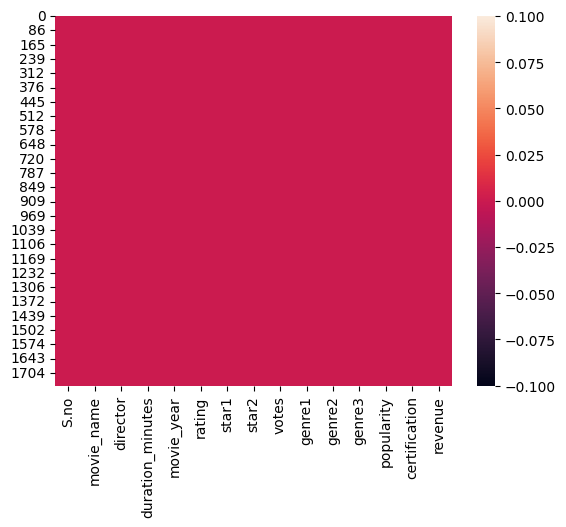

In [38]:
# plot an heat map to check the dataset 

sns.heatmap(df.isnull())

### statistics

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1399 entries, 0 to 1761
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S.no              1399 non-null   int64  
 1   movie_name        1399 non-null   object 
 2   director          1399 non-null   object 
 3   duration_minutes  1399 non-null   int64  
 4   movie_year        1399 non-null   int64  
 5   rating            1399 non-null   float64
 6   star1             1399 non-null   object 
 7   star2             1399 non-null   object 
 8   votes             1399 non-null   int64  
 9   genre1            1399 non-null   object 
 10  genre2            1399 non-null   object 
 11  genre3            1399 non-null   object 
 12  popularity        1399 non-null   float64
 13  certification     1399 non-null   object 
 14  revenue           1399 non-null   float64
dtypes: float64(3), int64(4), object(8)
memory usage: 174.9+ KB


In [40]:
df.describe()

,S.no,duration_minutes,movie_year,rating,votes,popularity,revenue
count,1399.000000,1399.000000,1399.000000,1399.000000,1.399000e+03,1399.000000,1399.000000
mean,849.391708,115.218013,2005.936383,6.588563,1.972918e+05,6.588563,78.695304
std,480.433245,20.767438,12.843933,0.798621,2.538500e+05,0.798621,104.794706
min,1.000000,45.000000,1924.000000,4.700000,2.501600e+04,4.700000,0.000000
25%,439.500000,100.000000,1999.000000,6.100000,5.152400e+04,6.100000,18.520000
50%,845.000000,112.000000,2009.000000,6.500000,1.078450e+05,6.500000,43.730000
75%,1259.500000,126.000000,2016.000000,7.100000,2.346305e+05,7.100000,100.235000
max,1699.000000,242.000000,2023.000000,9.000000,2.741650e+06,9.000000,936.660000


observation:
    
1) the count of every column having same means there is no misisng values 
2) as we can see ther is little bit diffrence between mean and median in all columns it means there is little bit skewness seen
3) this can show the standard deviation,min value and 25% value and max values

In [41]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['S.no', 'duration_minutes', 'movie_year', 'votes'], float64: ['rating', 'popularity', 'revenue'], object: ['movie_name', 'director', 'star1', 'star2', 'genre1', 'genre2', 'genre3', 'certification']}

In [42]:
# we have to make two list of numeical and categorical column
numerical=['votes', 'movie_year','duration_minutes', 'rating', 'popularity','revenue']
categorical=['movie_name', 'director', 'star1', 'star2', 'genre1', 'genre2', 'genre3', 'certification']


In [43]:
# count the values of every categorical columns
for i in categorical:
    print(df[i].value_counts())
    print("*"*100)


movie_name
The Dark Knight                    1
The Devil's Own                    1
Deliver Us from Evil               1
Parker                             1
The Divergent Series: Insurgent    1
                                  ..
Game Night                         1
Pacific Rim                        1
Conan the Barbarian                1
28 Weeks Later                     1
Snatched                           1
Name: count, Length: 1399, dtype: int64
****************************************************************************************************
director
Steven Spielberg    13
Tony Scott          11
Zack Snyder         10
Roland Emmerich     10
Richard Donner      10
                    ..
Ed Harris            1
Craig Gillespie      1
Kristian Levring     1
Joe Cornish          1
Jonathan Levine      1
Name: count, Length: 774, dtype: int64
****************************************************************************************************
star1
Elijah Wood              89
Mark 

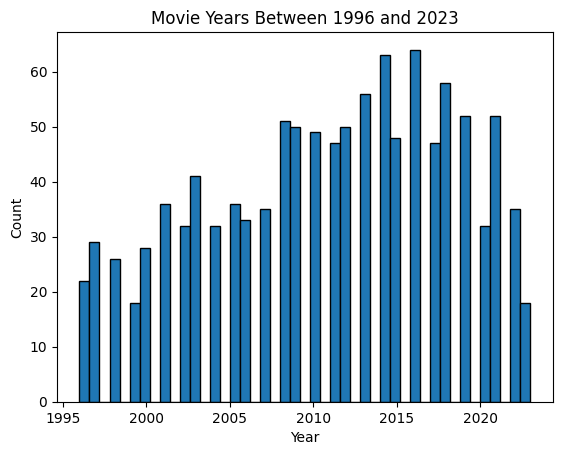

In [43]:
start_year = 1996
end_year = 2023

# Filter the DataFrame to include only movies within the specified year range
filtered_df = df[(df['movie_year'] >= start_year) & (df['movie_year'] <= end_year)]

# Plot the data using pandas plot function (assuming 'Year' is the column name)
x=filtered_df['movie_year'].plot(kind='hist', bins=45, edgecolor='black')

# Customize the plot (optional)
plt.title(f"Movie Years Between {start_year} and {end_year}")
plt.xlabel("Year")
plt.ylabel("Count")

# Show the plot
plt.show()

as we can see that higher percentage of movie in between 2010 to 2020 

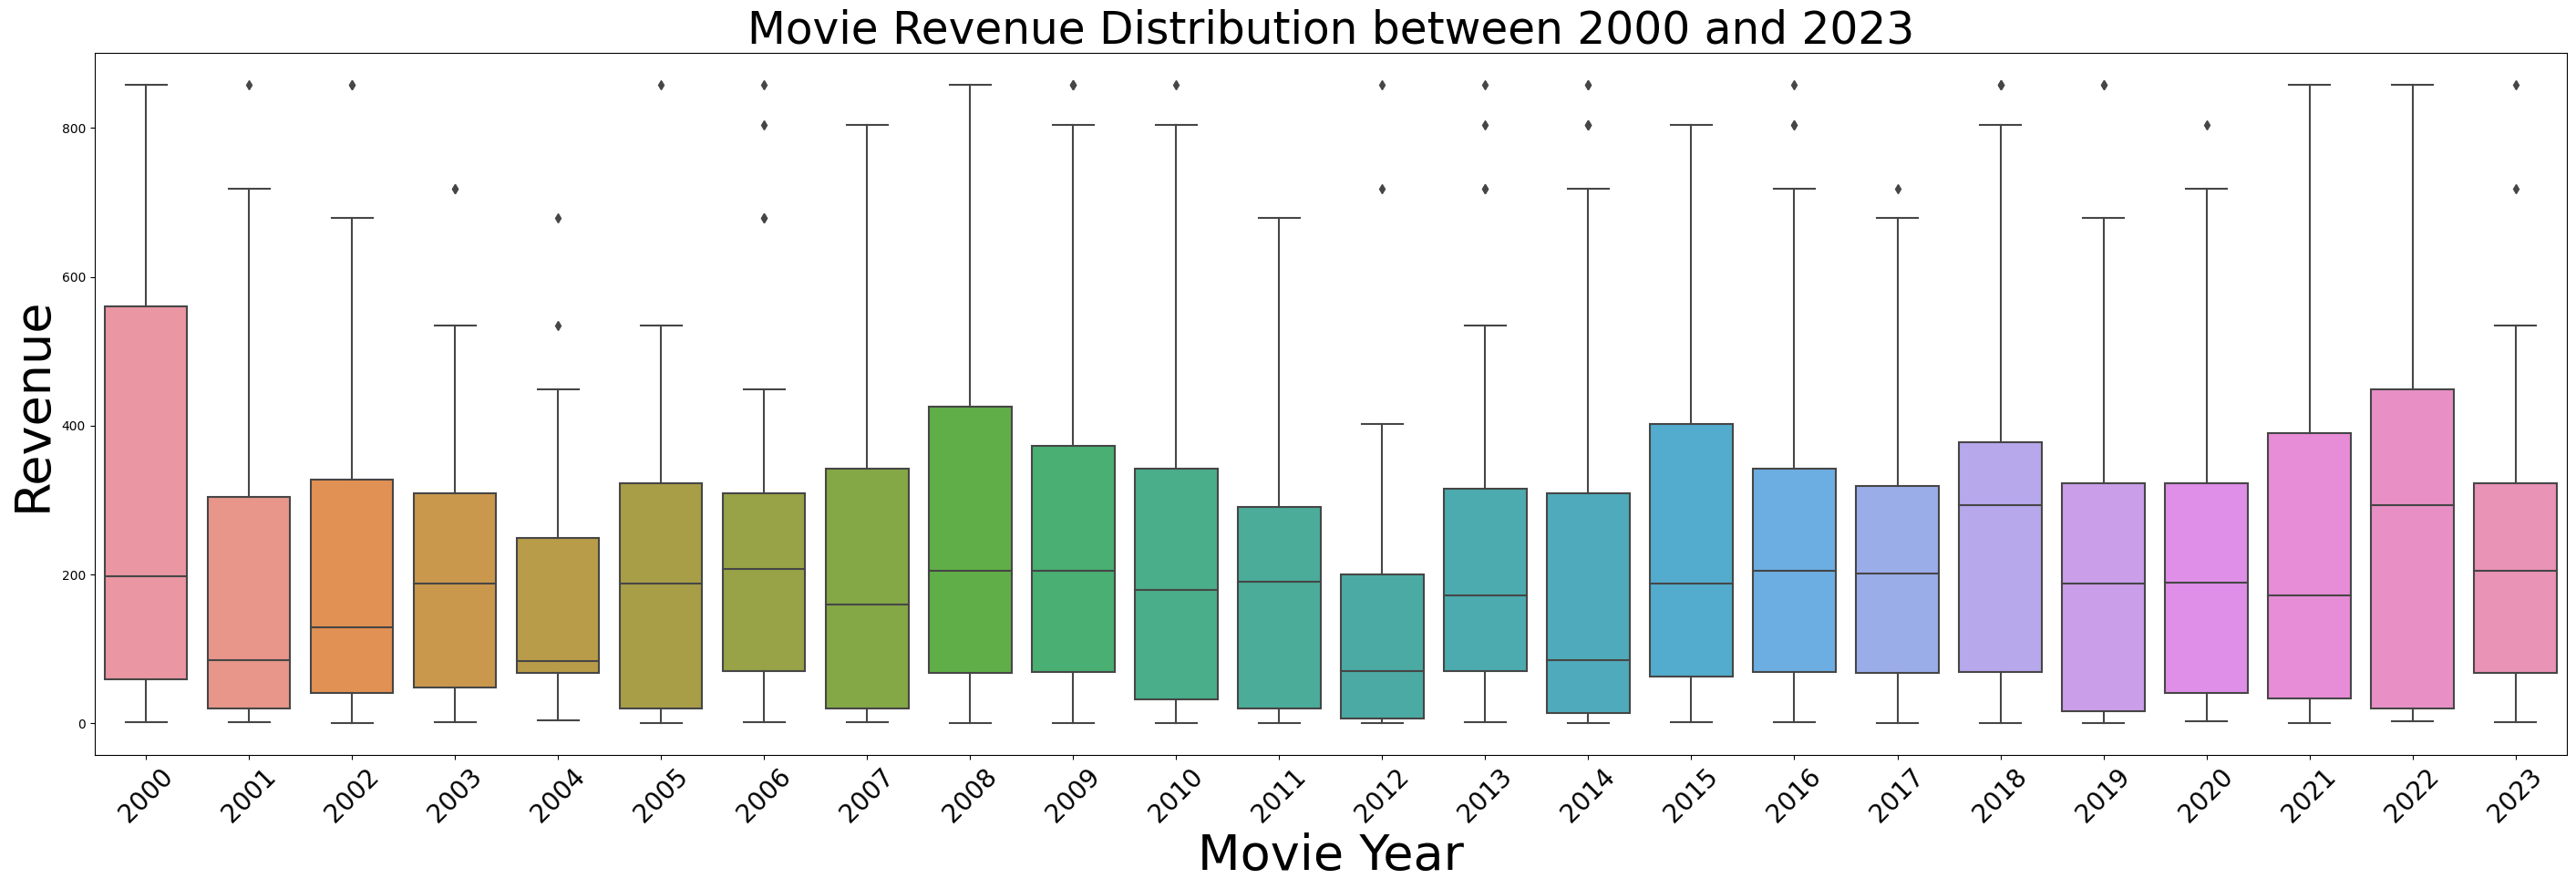

In [67]:
start_year = 2000
end_year = 2023

# Filter the DataFrame to include only movies within the specified year range
filtered_df = df[(df['movie_year'] >= start_year) & (df['movie_year'] <= end_year)]

# Create the plot
plt.figure(figsize=(35, 10))
sns.boxplot(data=filtered_df, x='movie_year', y='revenue')
plt.title(f"Movie Revenue Distribution between {start_year} and {end_year}",fontsize=35)
plt.xlabel("Movie Year",fontsize=39)
plt.ylabel("Revenue",fontsize=39)
plt.xticks(rotation=45,fontsize=20)
plt.show()

observation:

this dataset contaings very large number of dataset so we have to define this plot in range of 2000 to 2023 

as we can see that the revenue of the movie in year 2000,2008,2021,2022 more than other
    

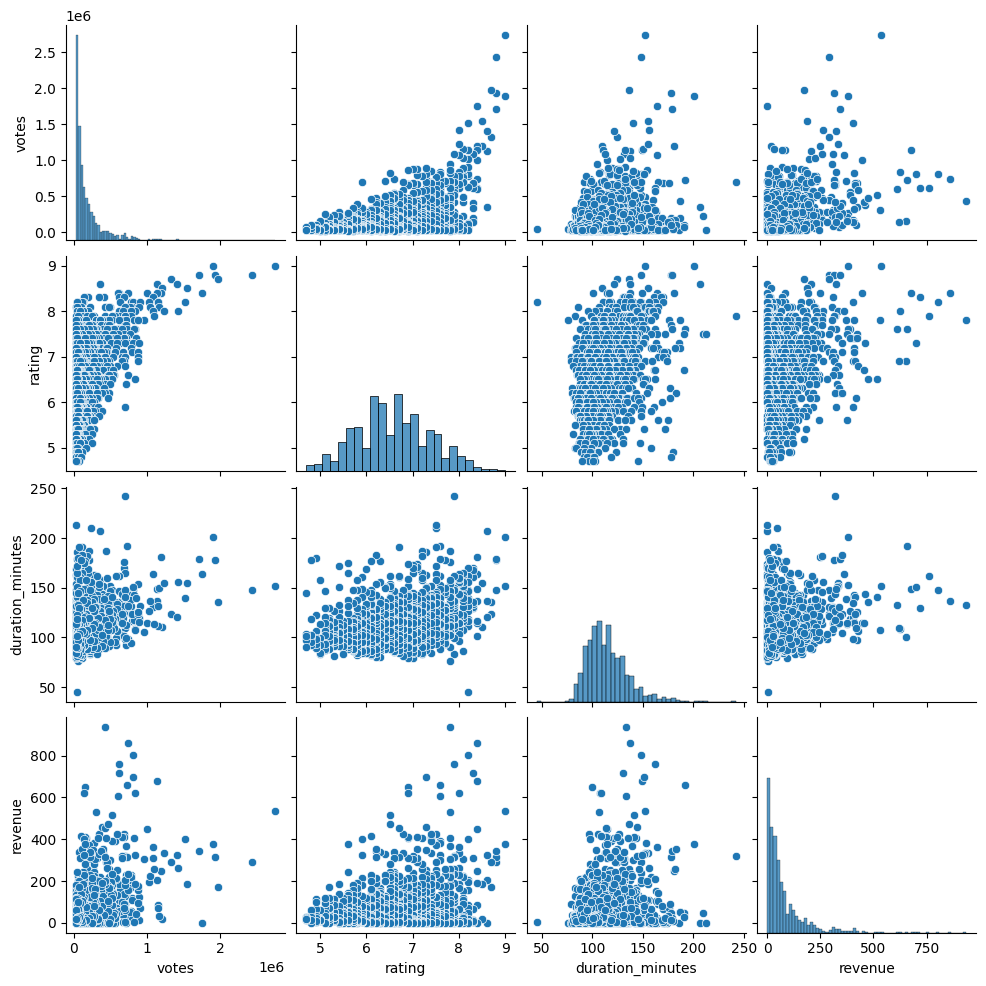

In [44]:
sns.pairplot(data=df, vars=["votes","rating","duration_minutes",'revenue'])
plt.show()

In [44]:
import plotly.express as px

## brief description of every movie with rating,year,voting and revenue in millions

In [48]:
px.scatter(df,x='revenue',y='votes',size='revenue',title="Distribution of Revenue and Votes")
 
           #,hover_name='movie_name',animation_frame='movie_year',,color = 'revenue'


#### From the above plot we observe that their are movies which has Higher Rating along with Higher Votes we can check accoring to the color if colors become more yellow then its having higher revenue as the color chart mention

### let us extract more insights from the Table.... 

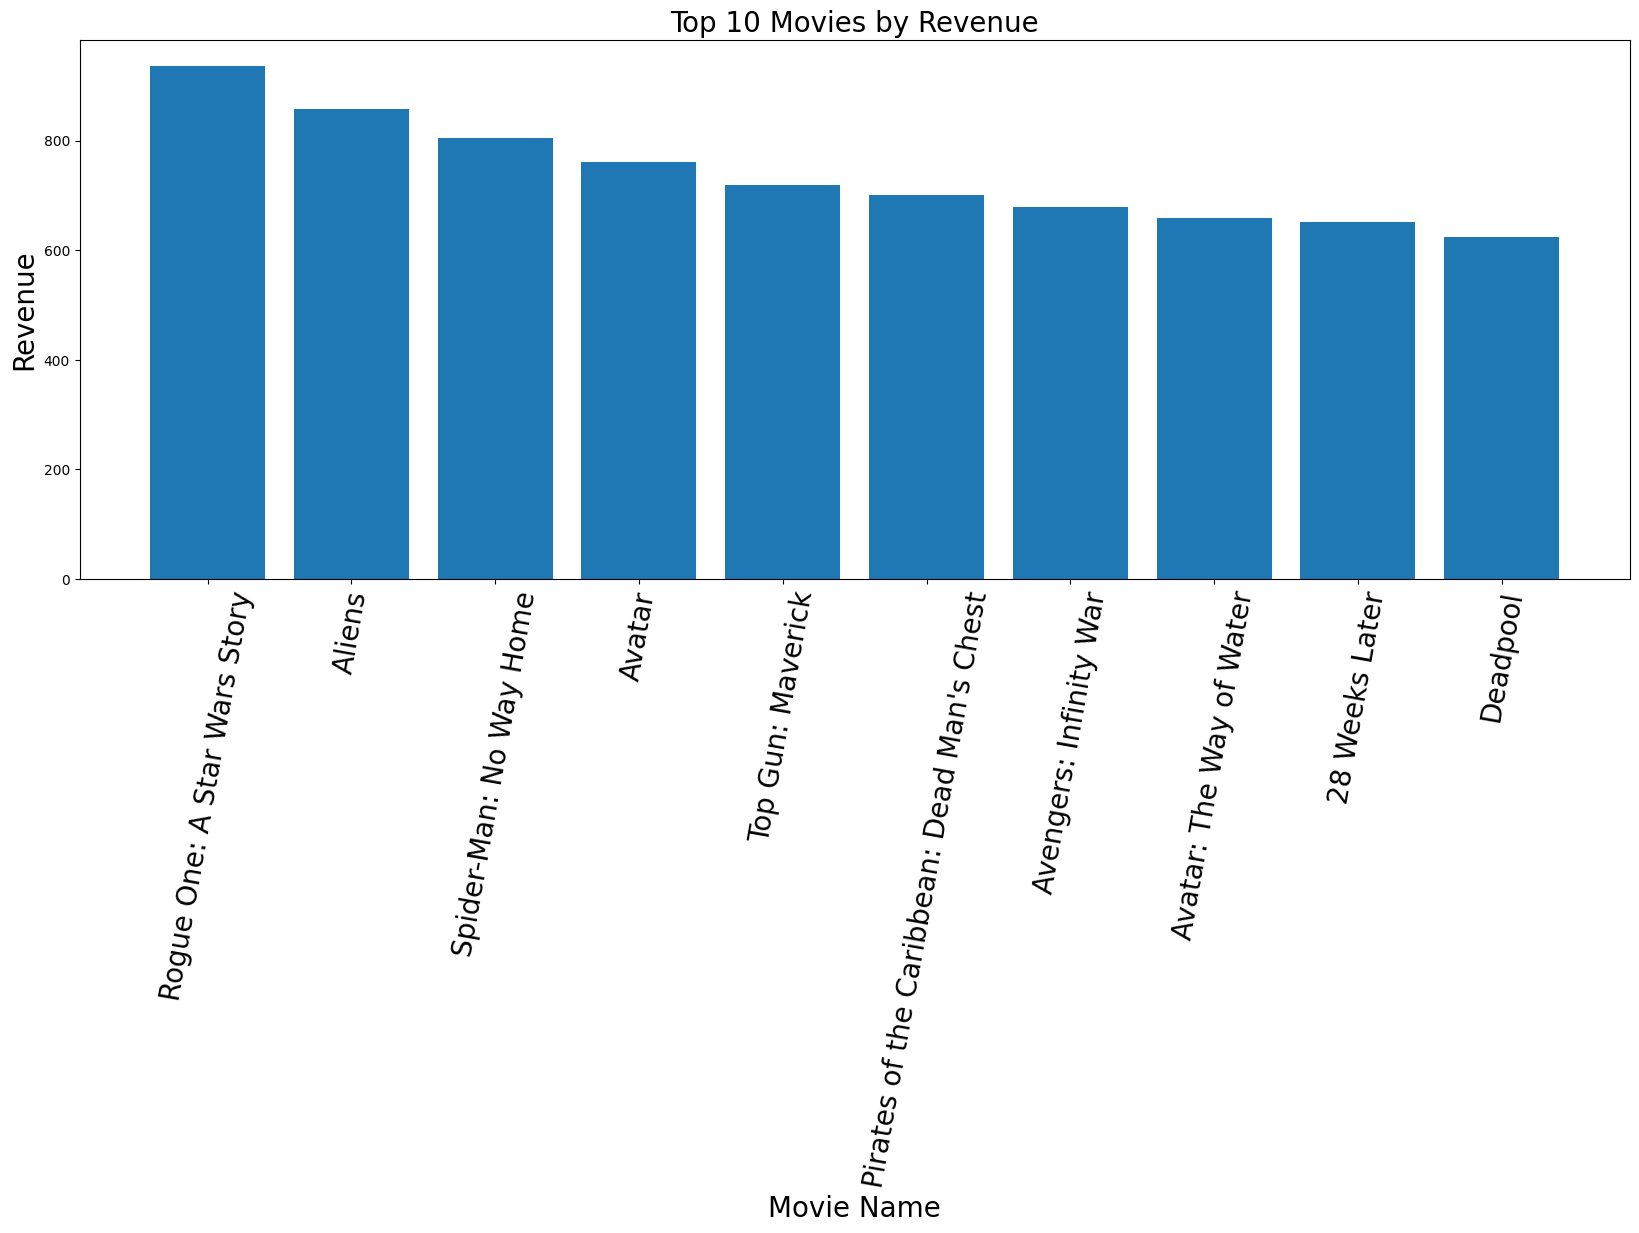

In [57]:
# Sort the DataFrame in descending order based on 'revenue' column
sorted_df = df.sort_values(by='revenue', ascending=False)

# Select the top 10 movies based on revenue
top_10_movies = sorted_df.head(10)

# Create the plot
plt.figure(figsize=(20, 7))
plt.bar(top_10_movies['movie_name'], top_10_movies['revenue'])
plt.xlabel('Movie Name',fontsize=20)
plt.ylabel('Revenue',fontsize=20)
plt.title('Top 10 Movies by Revenue',fontsize=20)
plt.xticks(rotation=80,fontsize=20)
plt.show()

#### as we can see the top ten movies by the revenue order

<Axes: ylabel='Frequency'>

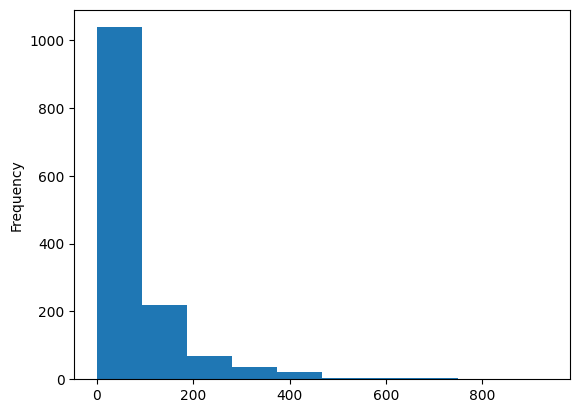

In [67]:
%matplotlib inline
df['revenue'].plot(kind='hist')

In [69]:
# top 5 director having higher movie count 

In [68]:
df.director.value_counts().head(5) 

director
Steven Spielberg    13
Tony Scott          11
Zack Snyder         10
Roland Emmerich     10
Richard Donner      10
Name: count, dtype: int64

In [71]:
top5_revenue_movies = df.groupby('director').agg({'revenue': 'mean', 'S.no':'count'}).sort_values(by='revenue',ascending=False).head(5)
top5_revenue_movies.rename(columns={'Rank': 'No of Movies'},inplace=True)
top5_revenue_movies

,revenue,S.no
director,,
John Milius,652.270000,1
Alejandro G. Iñárritu,623.280000,1
Jon Watts,444.323333,3
Anna Boden,426.830000,1
J.J. Abrams,396.575000,4


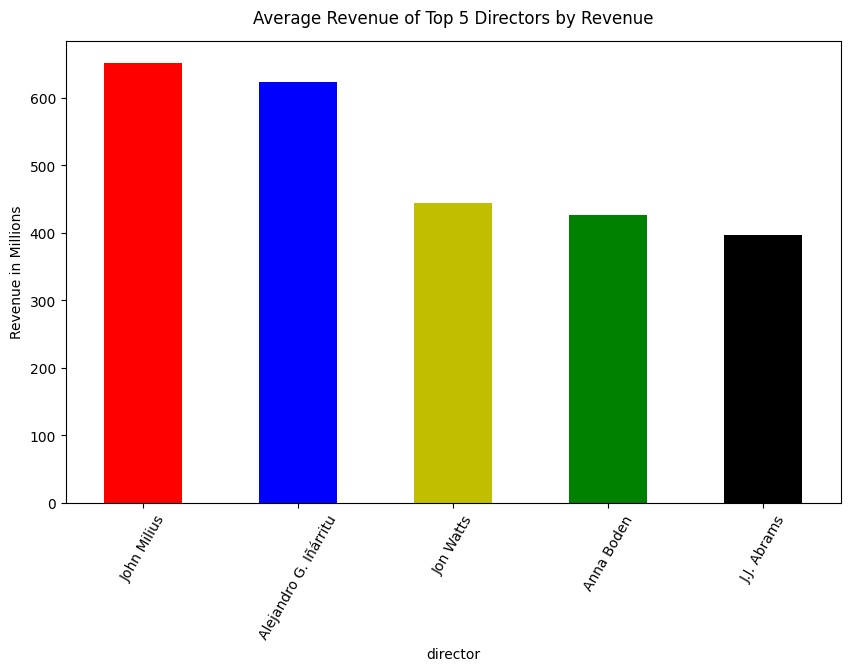

In [78]:
f, ax = plt.subplots(1,figsize=(10,6))
top5_revenue_movies['revenue'].plot.bar(color=['r', 'b', 'y', 'g', 'k'],ax=ax)
ax.set_ylabel('Revenue in Millions')
ax.set_title('Average Revenue of Top 5 Directors by Revenue', y=1.02)
ax.set_xticklabels(top5_revenue_movies.index, rotation = 60);


### which movie having the highest and lowest revenue of all time 

In [80]:
df['revenue'].max()

936.66

In [79]:
df[df['revenue'] == df['revenue'].max()][['movie_name','director','revenue']]

,movie_name,director,revenue
153,Rogue One: A Star Wars Story,Ivan Reitman,936.66


In [81]:
df['revenue'].min()

0.0

In [82]:
df[df['revenue'] == df['revenue'].min()][['movie_name','director','revenue']]

,movie_name,director,revenue
178,The Killer,Thomas Jahn,0.0
1073,Resident Evil: Degeneration,Timur Bekmambetov,0.0
1376,The Hunted,David Pastor,0.0
1576,Raw Deal,Jeremy Saulnier,0.0


##### 5 movies having the lowest revenue

### top 5 director names in term of movie rating

In [104]:
top_5_rating=df.groupby('director').agg({'rating':'mean'}).sort_values(by='rating',ascending=False).head(6)

In [103]:
top_5_rating

,rating
director,
Christopher Nolan,9.0
Peter Jackson,9.0
Lana Wachowski,8.7
Irvin Kershner,8.7
James Cameron,8.6
George Lucas,8.6


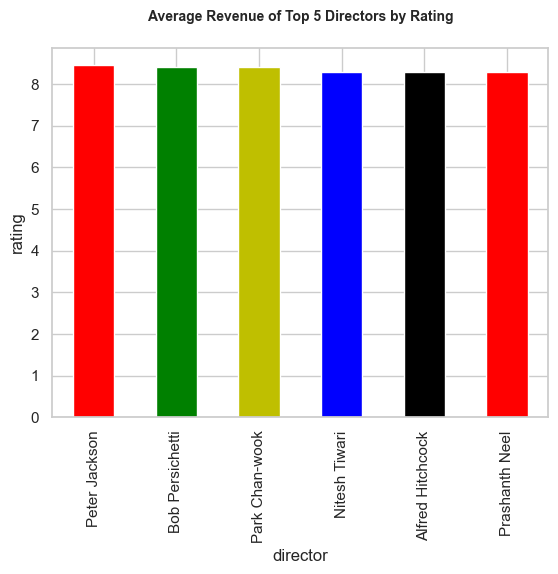

In [101]:
sns.set_theme(context='notebook',palette='viridis' ,style='whitegrid')
top_5_rating['rating'].plot.bar(color=['r','g','y','b','k'])
plt.ylabel("rating")
plt.title('Average Revenue of Top 5 Directors by Rating', y=1.05,fontsize=10, weight='bold')
plt.show()

##### same for the max rating 

In [108]:
# highest Rating
df[df['rating'] == df['rating'].max()][['director','rating']]


,director,rating
0,Christopher Nolan,9.0
1,Peter Jackson,9.0


In [106]:
top_5_max_rating=df.groupby('director').agg({'rating':'max'}).sort_values(by='rating',ascending=False).head(6)
top_5_max_rating

,rating
director,
Christopher Nolan,9.0
Peter Jackson,9.0
Lana Wachowski,8.7
Irvin Kershner,8.7
James Cameron,8.6
George Lucas,8.6


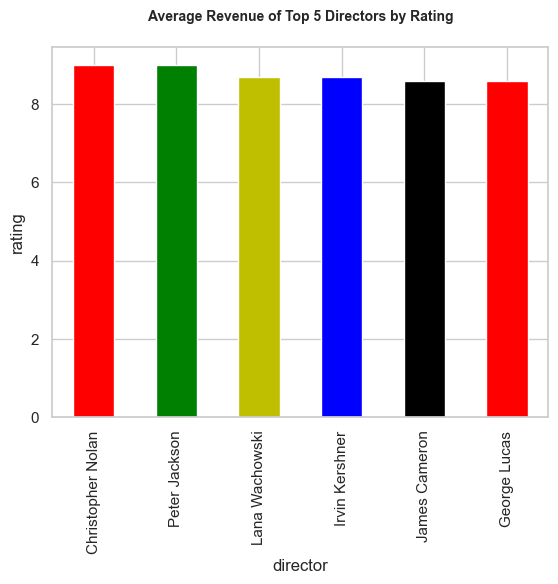

In [107]:
sns.set_theme(context='notebook',palette='viridis' ,style='whitegrid')
top_5_max_rating['rating'].plot.bar(color=['r','g','y','b','k'])
plt.ylabel("rating")
plt.title('Average Revenue of Top 5 Directors by Rating', y=1.05,fontsize=10, weight='bold')
plt.show()

In [114]:
df['duration_minutes'].describe()

count    1399.000000
mean      115.218013
std        20.767438
min        45.000000
25%       100.000000
50%       112.000000
75%       126.000000
max       242.000000
Name: duration_minutes, dtype: float64

#### as we can see that runtime of movies max to min we can select with our own choice

short runitme is 45 to 100 

medium runtime is 100 to 112

moderate long is 112 to 126

long is 126 to 242

In [117]:
runtime_bin_edges = [45,100,112,126,242]
runtime_bin_names = ['Short','Medium','Moderately Long','Long']
df['Runtime_level'] = pd.cut(df['duration_minutes'], bins = runtime_bin_edges,labels=runtime_bin_names)
df.head()

,S.no,movie_name,director,duration_minutes,movie_year,rating,star1,star2,votes,genre1,genre2,genre3,popularity,certification,revenue,Runtime_level
0,1,The Dark Knight,Christopher Nolan,152,2008,9.0,Christian Bale,Heath Ledger,2741650,Action,Crime,Drama,9.0,UA,534.86,Long
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,201,2003,9.0,Elijah Wood,Viggo Mortensen,1899228,Action,Adventure,Drama,9.0,U,377.85,Long
3,4,Inception,Christopher Nolan,148,2010,8.8,Leonardo DiCaprio,Joseph Gordon-Levitt,2432910,Action,Adventure,Sci-Fi,8.8,UA,292.58,Long
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,178,2001,8.8,Elijah Wood,Ian McKellen,1927643,Action,Adventure,Drama,8.8,U,315.54,Long
5,6,The Lord of the Rings: The Two Towers,Peter Jackson,179,2002,8.8,Elijah Wood,Ian McKellen,1713969,Action,Adventure,Drama,8.8,UA,342.55,Long


### we can plot the runtime levles

Text(0.5, 1.02, 'Movies Count of each Runtime level')

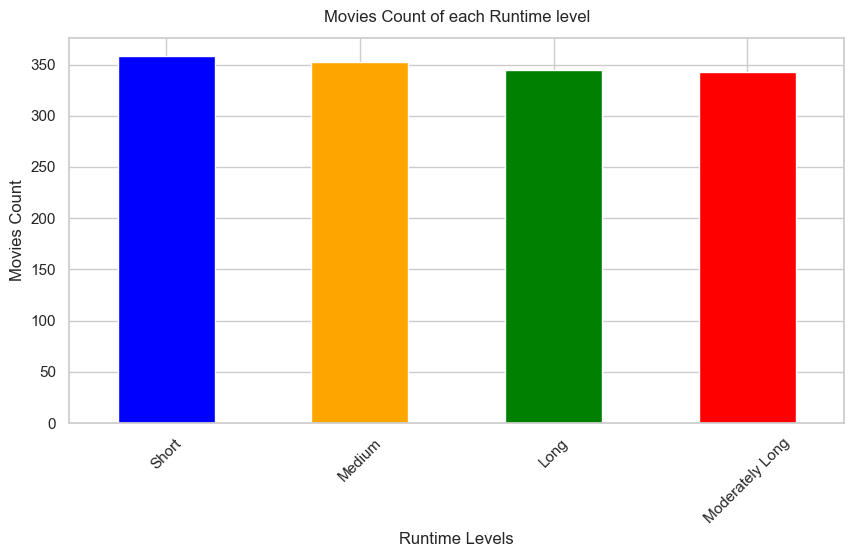

In [120]:
f,ax = plt.subplots(1, figsize=(10,5))
df['Runtime_level'].value_counts().plot.bar(color=['blue', 'orange','green','red','yellow'])
ax.set_ylabel('Movies Count');
ax.set_xlabel('Runtime Levels')
ax.set_xticklabels(df.Runtime_level.value_counts().index, rotation = 45);
ax.set_title('Movies Count of each Runtime level', y=1.02)

In [124]:
df['Runtime_level'].value_counts()

Runtime_level
Short              358
Medium             352
Long               345
Moderately Long    343
Name: count, dtype: int64

#### now lets check which  runtime_levels having the higest mean values of revenue,rating and votes

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1399 entries, 0 to 1761
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   S.no              1399 non-null   int64   
 1   movie_name        1399 non-null   object  
 2   director          1399 non-null   object  
 3   duration_minutes  1399 non-null   int64   
 4   movie_year        1399 non-null   int64   
 5   rating            1399 non-null   float64 
 6   star1             1399 non-null   object  
 7   star2             1399 non-null   object  
 8   votes             1399 non-null   int64   
 9   genre1            1399 non-null   object  
 10  genre2            1399 non-null   object  
 11  genre3            1399 non-null   object  
 12  popularity        1399 non-null   float64 
 13  certification     1399 non-null   object  
 14  revenue           1399 non-null   float64 
 15  Runtime_level     1398 non-null   category
dtypes: category(1), float64(3), i

In [134]:
runtime_status=df.groupby('Runtime_level')[['revenue', 'rating', 'votes']].mean()

In [135]:
runtime_status

,revenue,rating,votes
Runtime_level,,,
Short,56.118659,6.225140,114815.215084
Medium,67.564347,6.380114,147830.178977
Moderately Long,82.189242,6.703207,207733.370262
Long,110.223710,7.059710,323392.614493


### now lets plot the runtime status

[Text(0, 0, 'Short'),
 Text(1, 0, 'Medium'),
 Text(2, 0, 'Moderately Long'),
 Text(3, 0, 'Long')]

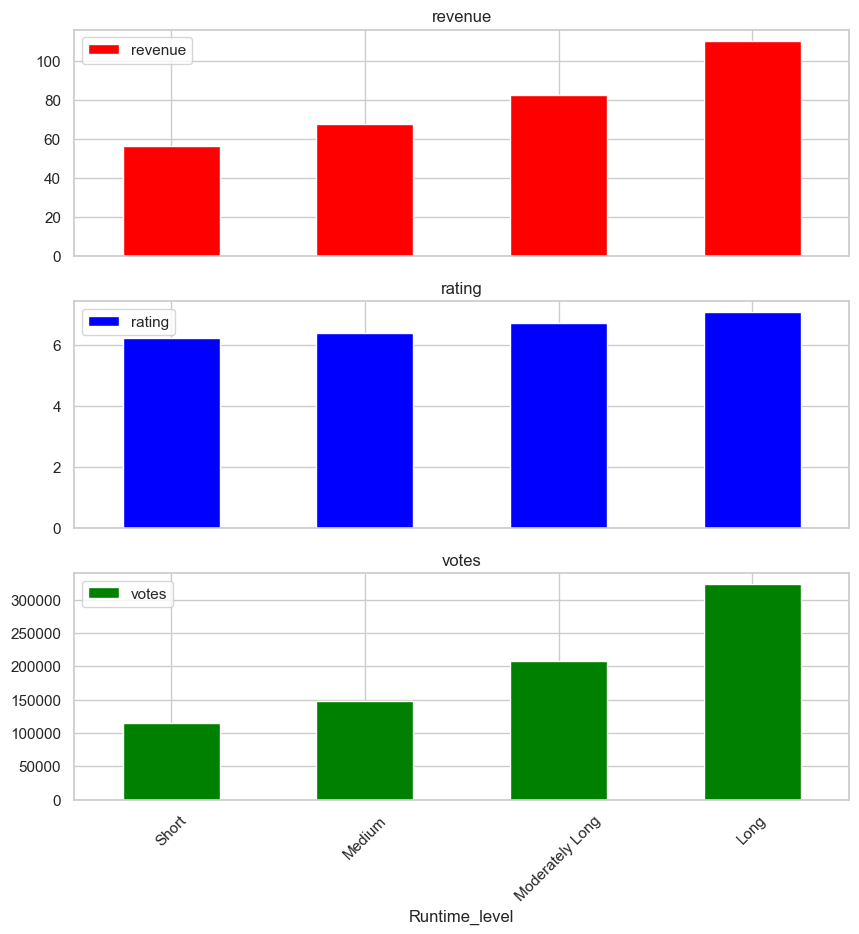

In [138]:
ax1,ax2,ax3 = runtime_status.plot.bar(subplots=True,color=['red','blue','green'])
fig = ax1.get_figure()
fig.set_size_inches(10, 10)
ax3.set_xticklabels(runtime_status.index, rotation= 45)

### observation:

as we can see than higher the moive duration having higher the revenue ,votes and higher rating

### there is three column of genre we can do eda on each column but its to lengthy so we can merge three columns into one and then doing eda

In [154]:
df['genre1'].value_counts()

genre1
Action       1347
Animation      52
Name: count, dtype: int64

<Axes: xlabel='genre1', ylabel='count'>

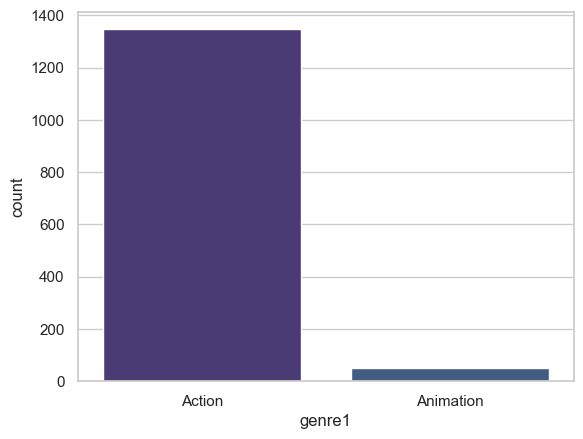

In [165]:
sns.countplot(x='genre1',data=df)

Text(0.5, 1.0, 'genre2')

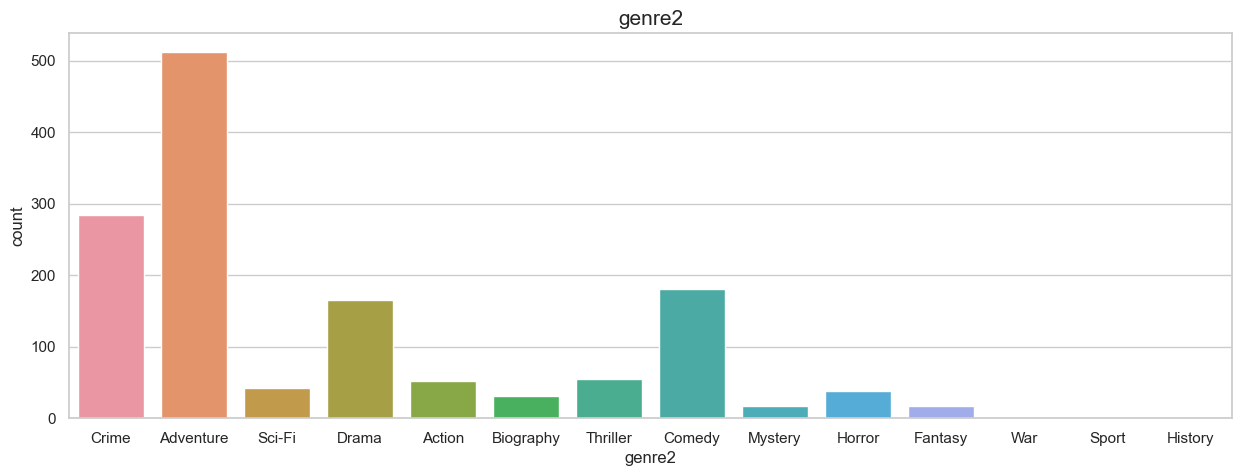

In [173]:
plt.figure(figsize=(15,5))
sns.countplot(x='genre2',data=df)
plt.title("genre2",fontsize=15)


Text(0.5, 1.0, 'genre2')

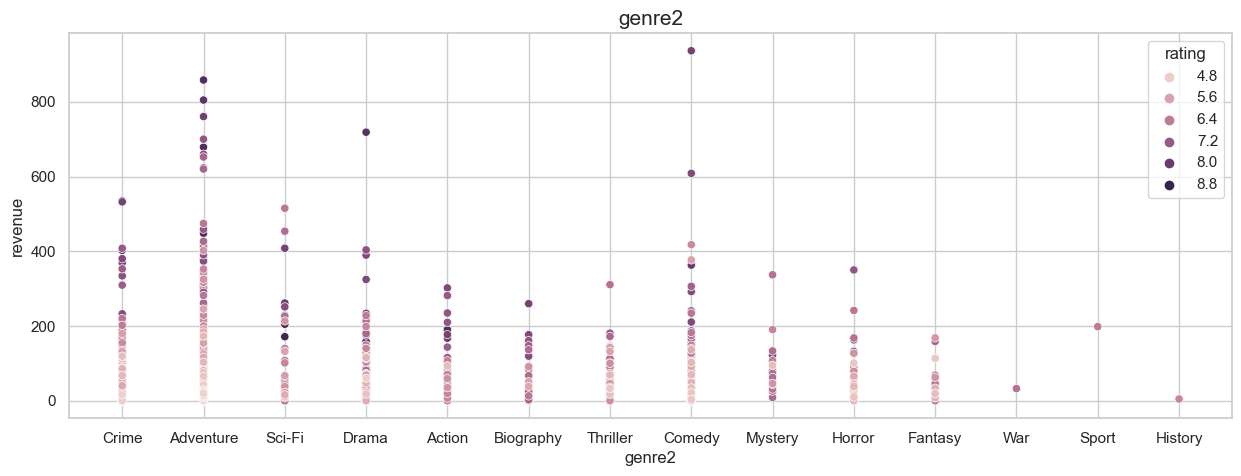

In [180]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='genre2',y='revenue',data=df,hue='rating')
plt.title("genre2",fontsize=15)


##### as we can see in genre2 higher the rating higher the revenue in adventure ,drama and comedy 

<Axes: title={'center': 'genre2'}, xlabel='genre2', ylabel='rating'>

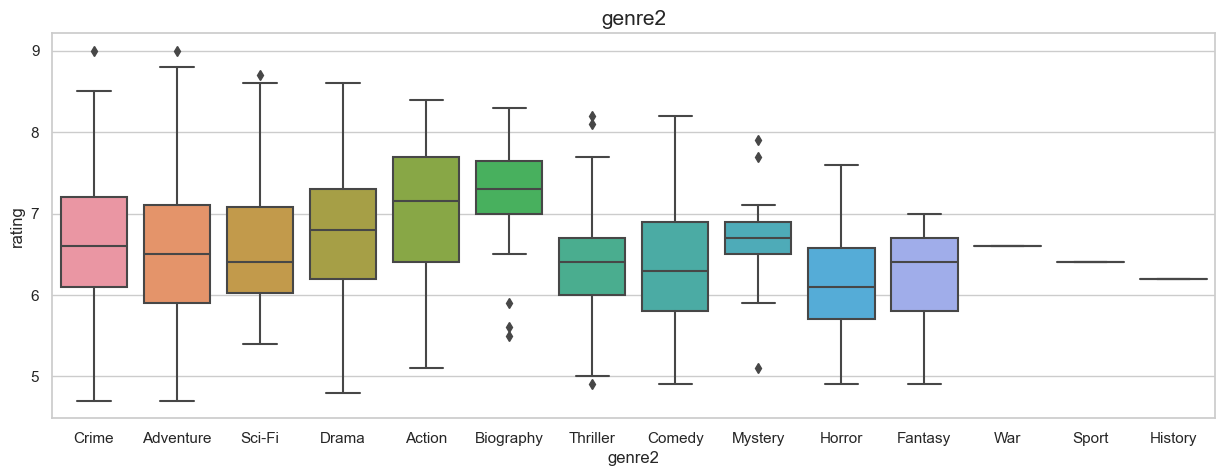

In [195]:
plt.figure(figsize=(15,5))
plt.title("genre2",fontsize=15)
sns.boxplot(x='genre2',y='rating',data=df)

### as we can see in genre2 adventur and crime genre havign the higher rating

Text(0.5, 1.0, 'genre3')

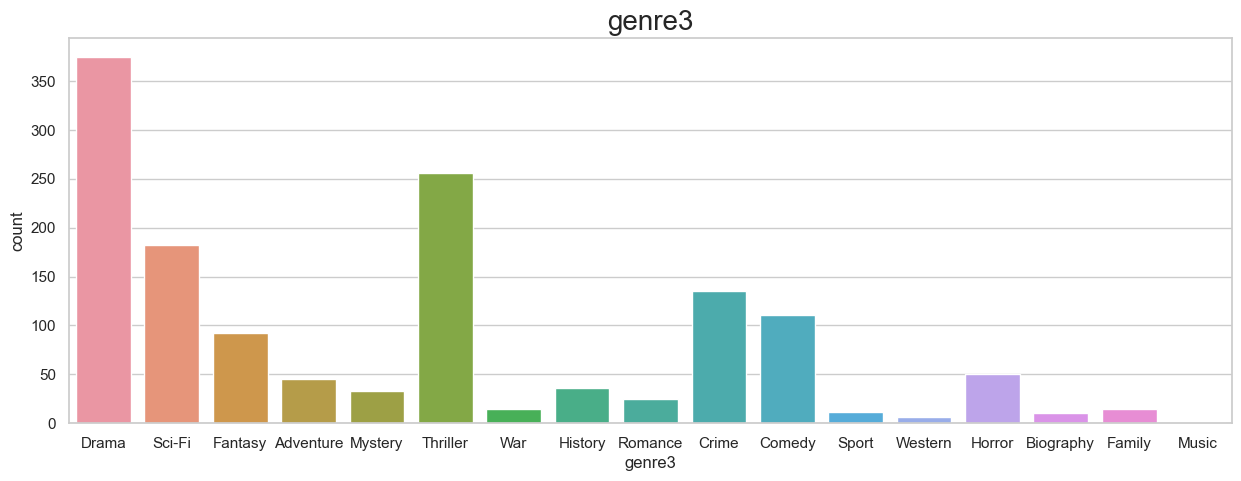

In [185]:
plt.figure(figsize=(15,5))
sns.countplot(x='genre3',data=df)
plt.title("genre3",fontsize=20)

Text(0.5, 1.0, 'genre3')

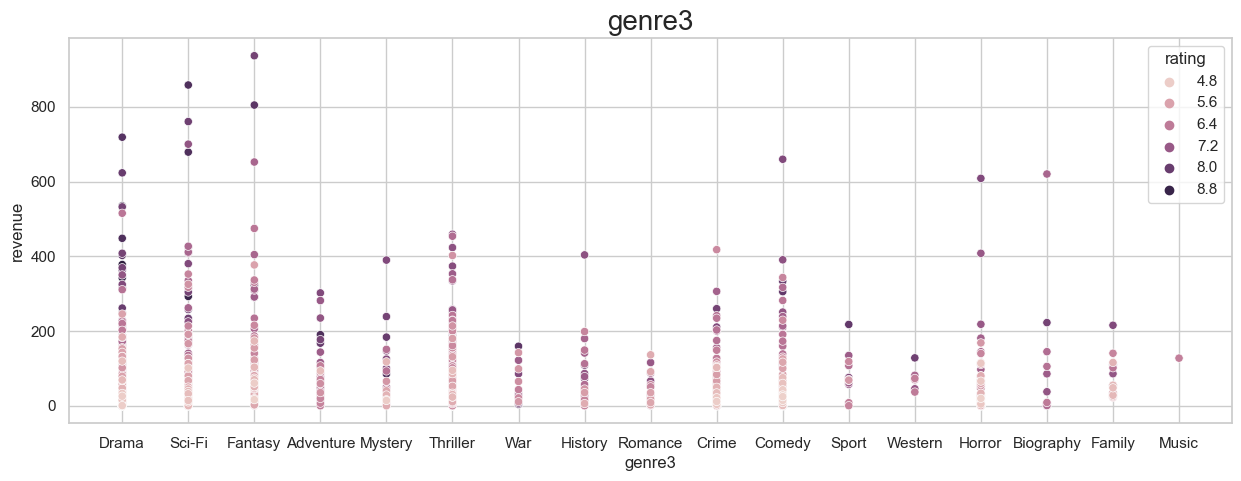

In [184]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='genre3',y='revenue',data=df,hue='rating')
plt.title("genre3",fontsize=20)

Text(0.5, 1.0, 'genre3')

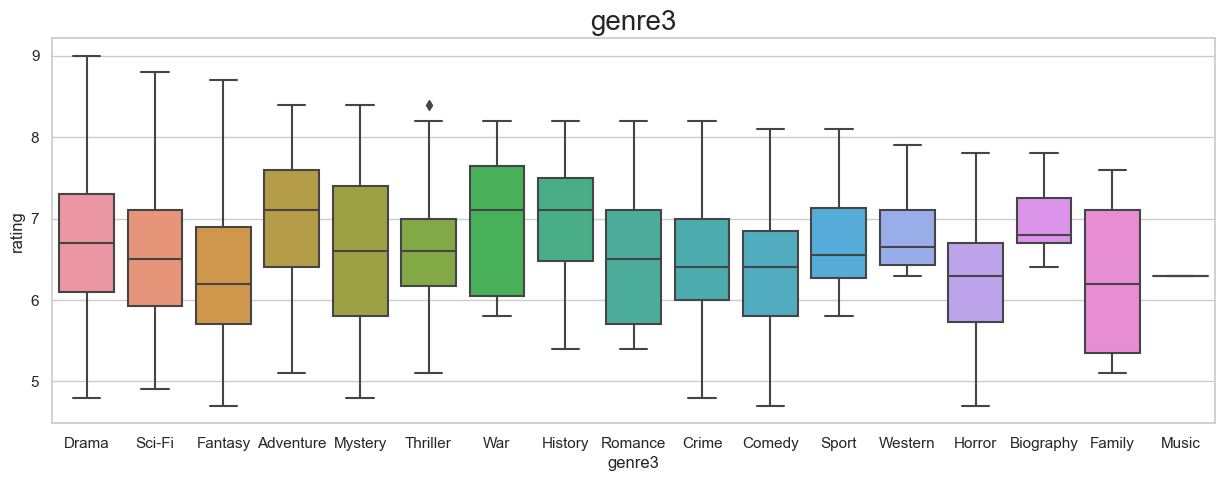

In [198]:
plt.figure(figsize=(15,5))
sns.boxplot(x='genre3',y='rating',data=df)
plt.title("genre3",fontsize=20)

### as we can see from drama,sci-fi and fantsty having more rating from the genre3

#### lets find some insigth on target variables revenue and votes

In [54]:
print(numerical)
print(categorical)

['votes', 'movie_year', 'duration_minutes', 'rating', 'popularity', 'revenue']
['movie_name', 'director', 'star1', 'star2', 'genre1', 'genre2', 'genre3', 'certification']


Text(0.5, 1.0, 'revenue as compared with votes')

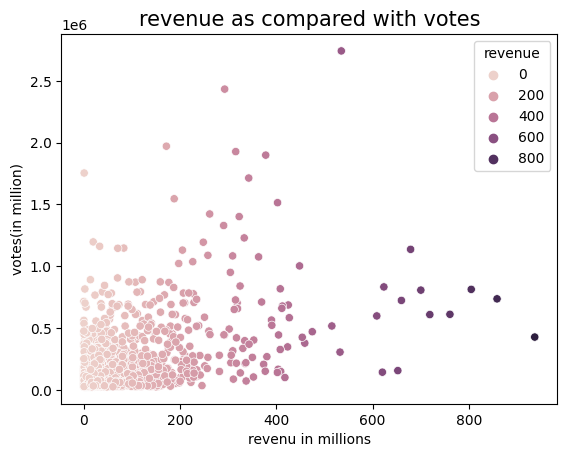

In [71]:
sns.scatterplot(x='revenue',y='votes',data=df,hue='revenue')
plt.ylabel("votes(in million)")
plt.xlabel("revenu in millions")
plt.title("revenue as compared with votes",fontsize=15)

#### as we can see most of the revenue movies comes under the range of 0 to 2 million of voting ,some movies comes under 600 to 800 millions  of revenue but lower the voting ratio

Text(0.5, 1.0, 'revenue as compared with rating')

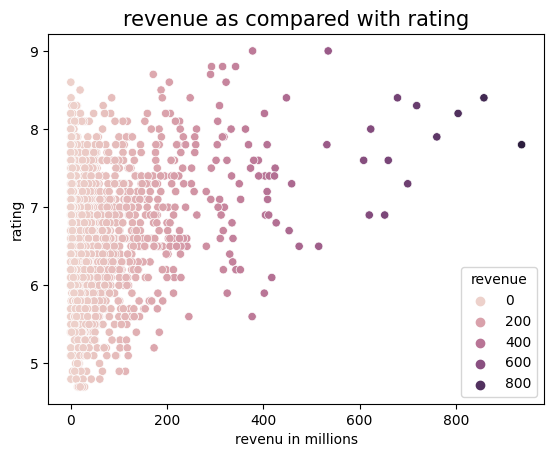

In [70]:
sns.scatterplot(x='revenue',y='rating',data=df,hue='revenue')
plt.ylabel("rating")
plt.xlabel("revenu in millions")
plt.title("revenue as compared with rating",fontsize=15)

#### as we can see most of the movies comes under the ration og 5 to 8 with the revenue range of 0 to 450 (million)

Text(0.5, 1.0, 'revenue as compared with movie duration')

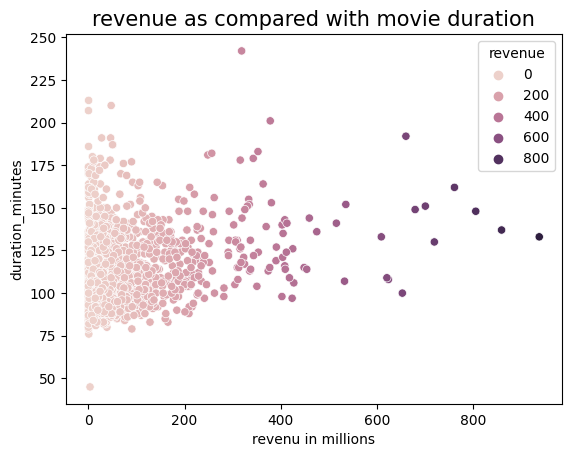

In [69]:
sns.scatterplot(x='revenue',y='duration_minutes',data=df,hue='revenue')
plt.ylabel("duration_minutes")
plt.xlabel("revenu in millions")
plt.title("revenue as compared with movie duration",fontsize=15)

##### as we can see that the movie duration is very important after seeing the chart it seems people invest more money when the movie duration range is between 60 to 175

Text(0.5, 1.0, 'duration_minutes as compared with votes')

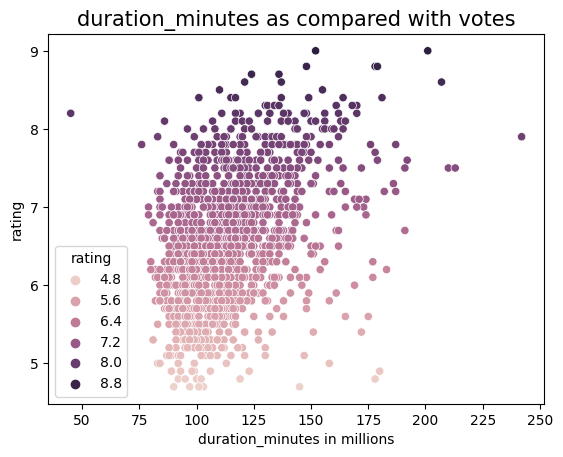

In [72]:
sns.scatterplot(x='duration_minutes',y='rating',data=df,hue='rating')
plt.ylabel("rating")
plt.xlabel("duration_minutes in millions")
plt.title("duration_minutes as compared with votes",fontsize=15)

##### we can see the movie having the higher rating in duration 75 to 175

In [73]:
print(numerical)

['votes', 'movie_year', 'duration_minutes', 'rating', 'popularity', 'revenue']


Text(0.5, 1.0, 'duration_minutes as compared with votes')

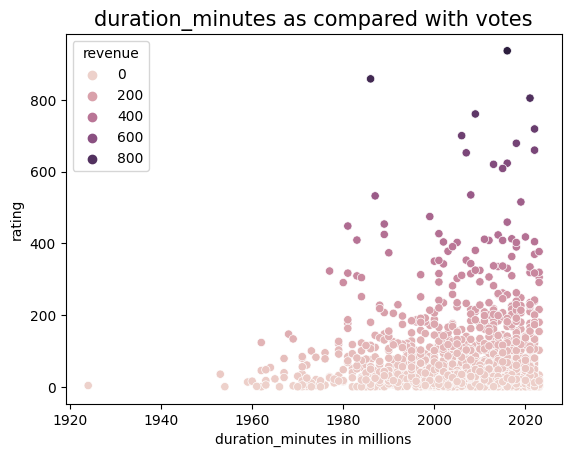

In [75]:
sns.scatterplot(x='movie_year',y='revenue',data=df,hue='revenue')
plt.ylabel("rating")
plt.xlabel("duration_minutes in millions")
plt.title("duration_minutes as compared with votes",fontsize=15)

##### as we can see that movie_year between 2000 to 2020 haivng the higher revenues 

In [46]:
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)  

In [47]:
df_Rev = df.groupby('movie_year')['revenue'].sum().round(1).reset_index()
px.line(df_Rev, x='movie_year',y='revenue',title="Revenue in Years")
#,template='plotly_dark',',,text='revenue'

# successfull movies according with revenue between 2015 to 2020 

In [84]:
df_2016 = df[df['movie_year']==2015].copy()
df_temp=df_2016.sort_values(by='revenue',ascending = False).head(10)
plt.figure(figsize=(15,5))
px.bar(df_temp,y='revenue',x='movie_name',title='Most successful Movies/Genre of Year:2016',text='rating',color='genre2')


<Figure size 1500x500 with 0 Axes>

In [70]:
df_2016 = df[df['movie_year']==2016].copy()
df_temp=df_2016.sort_values(by='revenue',ascending = False).head(10)
px.bar(df_temp,y='revenue',x='movie_name',color='genre2',text='rating',
       title='Most successful Movies/Genre of Year:2016')

In [71]:
df_2016 = df[df['movie_year']==2017].copy()
df_temp=df_2016.sort_values(by='revenue',ascending = False).head(10)
px.bar(df_temp,y='revenue',x='movie_name',color='genre2',text='rating',
       title='Most successful Movies/Genre of Year:2016')

In [85]:
df_2016 = df[df['movie_year']==2018].copy()
df_temp=df_2016.sort_values(by='revenue',ascending = False).head(10)
px.bar(df_temp,y='revenue',x='movie_name',color='genre2',text='rating',
       title='Most successful Movies/Genre of Year:2016')

In [86]:
df_2016 = df[df['movie_year']==2019].copy()
df_temp=df_2016.sort_values(by='revenue',ascending = False).head(10)
px.bar(df_temp,y='revenue',x='movie_name',color='genre2',text='rating',
       title='Most successful Movies/Genre of Year:2016')

In [88]:
df_2016 = df[df['movie_year']==2020].copy()
df_temp=df_2016.sort_values(by='revenue',ascending = False).head(10)
px.bar(df_temp,y='revenue',x='movie_name',color='genre2',text='rating',
       title='Most successful Movies/Genre of Year:2016')

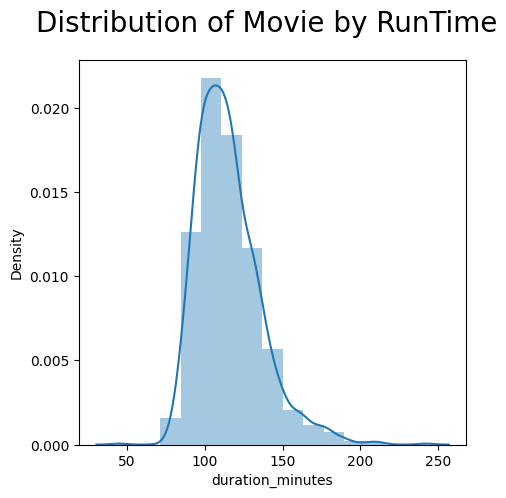

In [89]:
plt.figure(figsize=(5,5),facecolor='white')
sns.distplot(df['duration_minutes'],bins=15,kde=True)
plt.suptitle("Distribution of Movie by RunTime", fontsize=20)
plt.show()

**Most of Movies Belongs to Runtime Range - 90 to 130 Minutes !**

## Actors vs Revenue Distribution

##### As we can see there are lots of actor so its better to see the top 10 actors according with revenue 

In [90]:
movies_Rev=df.sort_values(by='revenue',ascending = False)[0:10]
px.pie(movies_Rev, values='revenue', names='star1',title='Actors vs Revenue Distribution')

observation star1:

    from the above graph we clearly see that uma thurman having the highest revenue 

In [91]:
movies_Rev=df.sort_values(by='revenue',ascending = False)[0:10]
px.pie(movies_Rev, values='revenue', names='star2',title='Actors vs Revenue Distribution')

observation star2:

    from the above graph we clearly see that uma thurman having the highest revenue 

## Movie vs Revenue Distribution

In [92]:
px.pie(movies_Rev, values='revenue', names='movie_name', title='Movies vs Revenue Distribution')

### lets see the stars of these top revenue movies to crossverify the most revenue stars

In [93]:
# for star1
px.bar(movies_Rev,x='star1',y='revenue',color='votes',
       hover_name='movie_name', text='rating')

In [94]:
# for star2
px.bar(movies_Rev,x='star2',y='revenue',color='votes',
       hover_name='movie_name', text='rating')

## Let us now look at the list of Top Directors and their revenue !

In [95]:
top_director=df.groupby('director')['revenue'].sum().reset_index()
top_director.sort_values('revenue',ascending =False)[0:5]

,director,revenue
488,Michael Bay,1790.05
298,J.J. Abrams,1586.30
773,Zack Snyder,1506.39
707,Steven Spielberg,1459.03
51,Anthony Russo,1442.16


In [96]:
px.bar(movies_Rev,x='director',y='revenue',
       color='popularity',hover_name='movie_name',
       text='revenue', title='Top Directors and Revenue Distribution by popularity')

## for star1 

In [98]:
movies_Votes=df.sort_values(by='votes',ascending = False)[0:20]

px.bar(movies_Votes,x='star1',y='votes',color='revenue',
       hover_name='movie_name',text='rating',title='Most Popular/Voted Actors')

## for star2

In [99]:
movies_Votes=df.sort_values(by='votes',ascending = False)[0:20]

px.bar(movies_Votes,x='star2',y='votes',color='revenue',
       hover_name='movie_name',text='rating',title='Most Popular/Voted Actors')

***We can extract list of Top Actors by Revenue generated in Movies.
And Let us look at the distribution of Revenue and Rating for Top Actors.!***

## for star1

In [100]:
top_actor = pd.pivot_table(df,index=['star1'],
                           values=['revenue','votes','rating'],
                           aggfunc={'revenue':np.sum,'votes':np.mean,'rating':np.mean})

In [101]:
actor = top_actor.sort_values(by='revenue',ascending = False).reset_index()[0:20]
actor

,star1,rating,revenue,votes
0,Elijah Wood,6.637079,6928.03,208580.887640
1,Mark Hamill,6.625610,6691.68,199054.207317
2,Christian Bale,6.618519,6467.44,255721.061728
3,Harrison Ford,6.712281,5550.97,198408.280702
4,Joe Russo,6.613333,4238.46,165628.783333
5,Toshirô Mifune,6.549123,4231.41,182176.438596
6,Tatsuya Nakadai,6.551724,4077.19,169446.103448
7,Rishab Shetty,6.451724,3764.28,207124.896552
8,Kamal Haasan,6.603448,3077.27,192403.379310
9,Bruce Willis,6.510000,2996.19,208197.800000


In [102]:
px.scatter(actor,y= 'revenue',x= 'rating', 
           color= 'revenue',size='rating',text='star1',
           title='Revenue Vs Rating of most Popular Actor and No of Movies')

##  for star2

In [103]:
top_actor = pd.pivot_table(df,index=['star2'],
                           values=['revenue','votes','rating'],
                           aggfunc={'revenue':np.sum,'votes':np.mean,'rating':np.mean})
actor = top_actor.sort_values(by='revenue',ascending = False).reset_index()[0:20]
actor

,star2,rating,revenue,votes
0,Harrison Ford,6.625610,6691.68,199054.207317
1,Ian McKellen,6.616129,4558.26,206579.145161
2,Robert Downey Jr.,6.613333,4238.46,165628.783333
3,Paresh Rawal,6.538333,4047.39,164078.350000
4,Kishore Kumar G.,6.451724,3764.28,207124.896552
5,Vijay Sethupathi,6.603448,3077.27,192403.379310
6,Sean Connery,6.750000,3035.48,198273.428571
7,Alan Rickman,6.510000,2996.19,208197.800000
8,Eijirô Tôno,6.451724,2685.75,162234.448276
9,Zendaya,6.432143,2650.50,233413.321429


In [104]:
px.scatter(actor,y= 'revenue',x= 'rating', 
           color= 'revenue',size='rating',text='star2',
           title='Revenue Vs Rating of most Popular Actor and No of Movies')

In [105]:
px.histogram(df, x='rating',y='revenue',title='Impact of rating on Revenue')

# Feature enginnering

In [43]:
#as popularity and ratings sharing the same values we can drop one from the two we can drop the popualrity 
df.drop('popularity',axis=1,inplace=True)

In [44]:
df

,S.no,movie_name,director,duration_minutes,movie_year,rating,star1,star2,votes,genre1,genre2,genre3,certification,revenue
0,1,The Dark Knight,Christopher Nolan,152,2008,9.0,Christian Bale,Heath Ledger,2741650,Action,Crime,Drama,UA,534.86
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,201,2003,9.0,Elijah Wood,Viggo Mortensen,1899228,Action,Adventure,Drama,U,377.85
3,4,Inception,Christopher Nolan,148,2010,8.8,Leonardo DiCaprio,Joseph Gordon-Levitt,2432910,Action,Adventure,Sci-Fi,UA,292.58
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,178,2001,8.8,Elijah Wood,Ian McKellen,1927643,Action,Adventure,Drama,U,315.54
5,6,The Lord of the Rings: The Two Towers,Peter Jackson,179,2002,8.8,Elijah Wood,Ian McKellen,1713969,Action,Adventure,Drama,UA,342.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,1694,Elektra,Willard Huyck,97,2005,4.7,Tatsuya Nakadai,Akira Terao,49283,Action,Adventure,Comedy,U,14.38
1758,1696,Kisi Ka Bhai Kisi Ki Jaan,Frank Miller,145,2023,4.7,Manoj Bajpayee,Nawazuddin Siddiqui,62188,Action,Crime,Fantasy,PG-13,16.30
1759,1697,The Spirit,Ben Stiller,103,2008,4.7,Prabhas,Rana Daggubati,73346,Action,Adventure,Comedy,U,28.85
1760,1698,Zoolander 2,Jonathan Levine,101,2016,4.7,Toshirô Mifune,Eijirô Tôno,36636,Action,Adventure,Comedy,R,24.41


##### checkig and removing of the outliers

In [49]:
numerical=['votes', 'movie_year', 'duration_minutes', 'rating', 'revenue']

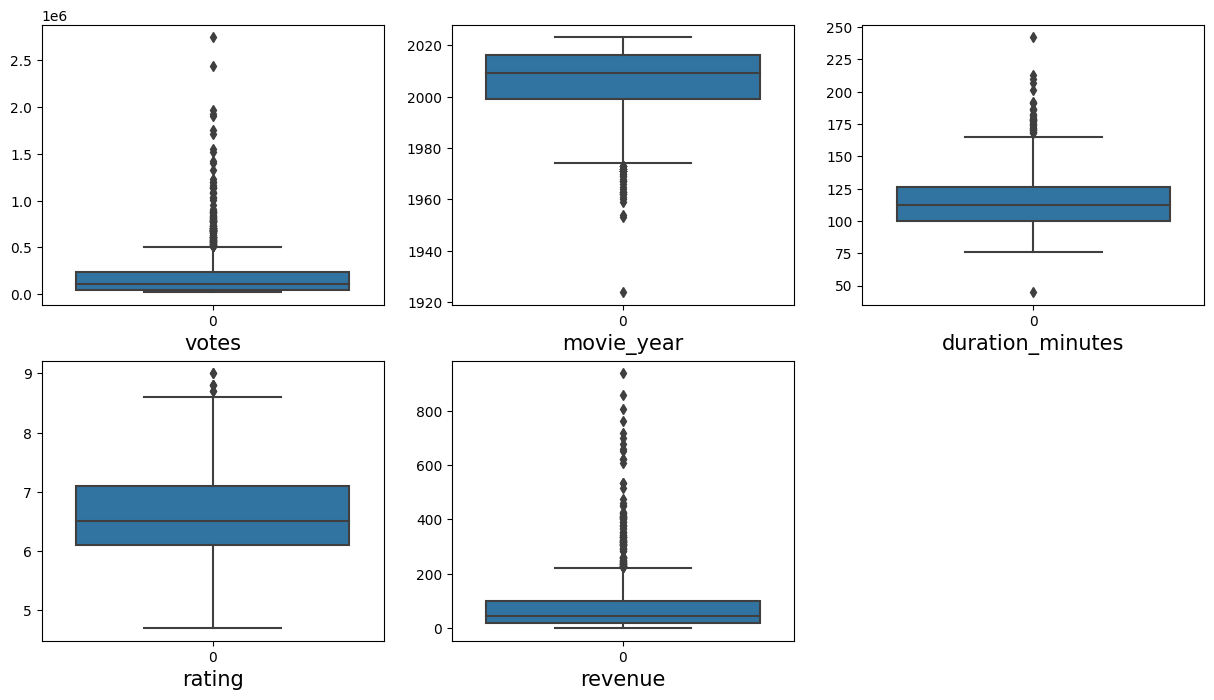

In [50]:
plt.figure(figsize=(15,8))
p=1
for i in numerical:
    plt.subplot(2,3,p)
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize=15)
    p+=1

as we can see there is outliers present in votes,movie_year,duration_minutes,rating and revenue but we can not remove the outliers from the target variable 

##### first we can take our target variable as votes so we cant drop or remove the outliers from this

##### we can use the zscore method to remove or to reduce the oultier

In [51]:
from scipy.stats import zscore

In [52]:
outlier=df[['movie_year','duration_minutes','rating','revenue']]

In [53]:
z=np.abs(zscore(outlier))

In [54]:
# take threshold as 3
threshold=3
np.where(z<3)

(array([   0,    0,    1, ..., 1398, 1398, 1398], dtype=int64),
 array([0, 1, 0, ..., 1, 2, 3], dtype=int64))

In [55]:
z.iloc[0,0]

0.16072606037820267

In [56]:
df1=df[(z<3).all(axis=1)]

In [57]:
#check the shape of datafrmae before and after and percentage of data removed
print("shaape of old dataframe",df.shape)
print("shape of the new dataframe",df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

shaape of old dataframe (1399, 14)
shape of the new dataframe (1333, 14)
Percentage of data loss post outlier removal:  4.717655468191565


it is very minumum percentage of data removed we can moved on further steps

## now check for the skewness 

In [58]:
numerical

['votes', 'movie_year', 'duration_minutes', 'rating', 'revenue']

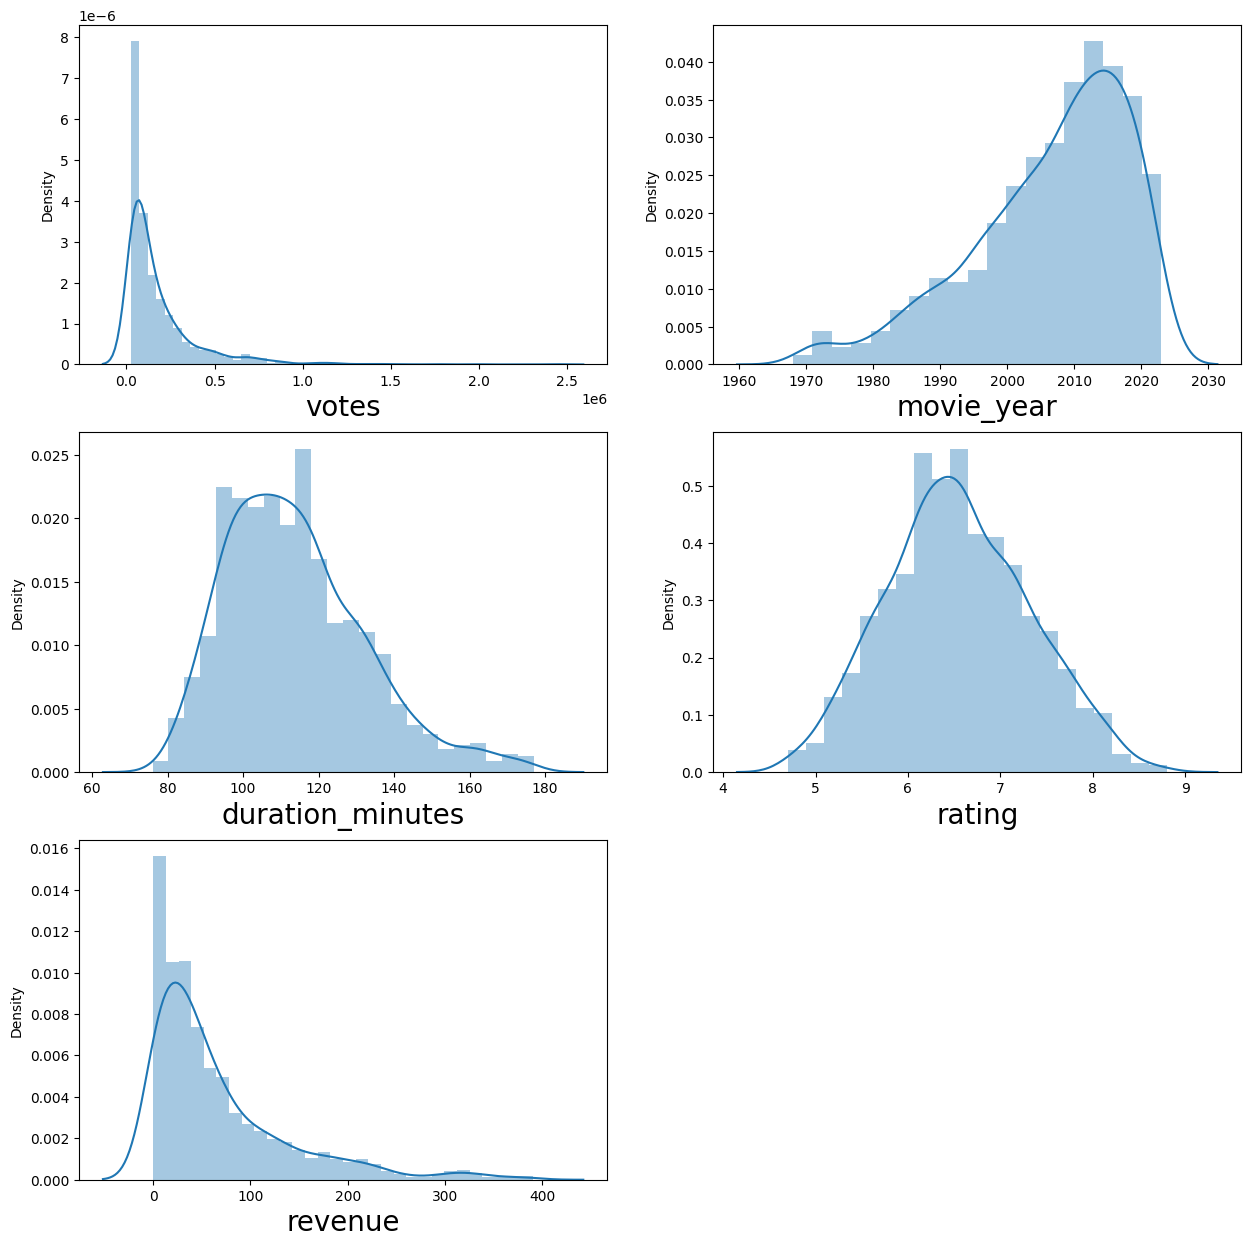

In [59]:
p=1
plt.figure(figsize=(15,15))
for i in numerical:
    plt.subplot(3,2,p)
    sns.distplot(df1[i])
    plt.xlabel(i,fontsize=20)
    p+=1
plt.show()

### lets check for the skewness

In [189]:
df2=df1.copy()

In [157]:
#df2.drop(["S.no",'movie_name','director','star1','star2','genre1','genre2','genre3','certification'],inplace=True,axis=1)

In [190]:
df2.drop(["S.no"],axis=1,inplace=True)

In [191]:
df2.reset_index(drop=True, inplace=True)

In [192]:
sk=['movie_year','rating','votes','duration_minutes']

In [193]:
sk

['movie_year', 'rating', 'votes', 'duration_minutes']

as we can see the skewness is movie_year,duration_minutes and revenue so we have to reduce the skewness

In [194]:
from sklearn.preprocessing import PowerTransformer

In [195]:
scaler=PowerTransformer(method='yeo-johnson')

In [196]:
df2[sk] = scaler.fit_transform(df2[sk].values)

In [197]:
df2[sk].skew()

movie_year         -0.369341
rating             -0.004752
votes               0.066002
duration_minutes    0.019049
dtype: float64

### its time to encode the categorical variable into numerical

In [198]:
from sklearn.preprocessing import LabelEncoder

we dont need the serial column more so its bettwe to drop 

In [199]:
# we can drop the movie name ,star1,star2 
#df2.drop(['movie_name','star1','star2','genre1','genre2','genre3','certification'],inplace=True,axis=1)

In [200]:
category=['director','movie_name','star1','star2','genre1','genre2','genre3','certification']
le=LabelEncoder()
for i in category:
    df2[i]=le.fit_transform(df2[i])

In [201]:
df2

,movie_name,director,duration_minutes,movie_year,rating,star1,star2,votes,genre1,genre2,genre3,certification,revenue
0,468,120,1.643013,0.203948,2.707936,18,15,2.499531,0,1,12,17,292.58
1,1110,423,1.199134,-0.767041,2.598212,19,18,2.381543,0,10,4,9,171.48
2,908,283,0.674714,-1.961716,2.598212,21,10,2.145910,0,1,6,17,290.48
3,954,295,1.238920,-1.334295,2.487758,2,22,2.043043,0,10,4,9,204.84
4,907,250,0.528342,-2.106891,2.487758,21,10,2.178755,0,1,6,14,322.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,294,748,-0.946421,-0.267775,-2.572502,31,2,-0.851181,0,1,2,14,14.38
1329,541,230,1.538543,1.714247,-2.572502,20,29,-0.563005,0,4,6,12,16.30
1330,1178,64,-0.517244,0.008771,-2.572502,24,31,-0.367119,0,1,2,14,28.85
1331,1330,377,-0.654975,0.845834,-2.572502,34,6,-1.240193,0,1,2,13,24.41


### checking the co relation and multicolinearity 

In [202]:
df2.corr()

,movie_name,director,duration_minutes,movie_year,rating,star1,star2,votes,genre1,genre2,genre3,certification,revenue
movie_name,1.000000,0.001088,-0.001523,-0.003481,0.015420,0.002399,0.003108,0.022777,-0.044383,0.055167,0.002688,-0.026829,0.048508
director,0.001088,1.000000,-0.023811,-0.032121,0.022240,-0.007609,-0.078814,0.010776,-0.037677,0.006670,0.038943,-0.037705,0.011295
duration_minutes,-0.001523,-0.023811,1.000000,0.147325,0.375152,-0.004054,-0.005505,0.295886,0.020484,-0.005435,0.016301,0.041254,0.156111
movie_year,-0.003481,-0.032121,0.147325,1.000000,-0.074891,0.052402,-0.002081,0.111321,-0.022192,-0.048250,-0.005159,0.087679,0.074927
rating,0.015420,0.022240,0.375152,-0.074891,1.000000,-0.011065,0.009940,0.437867,0.135154,-0.034312,0.000224,0.012293,0.235488
star1,0.002399,-0.007609,-0.004054,0.052402,-0.011065,1.000000,-0.057392,-0.002144,0.025954,0.023671,-0.015216,0.061627,-0.034909
star2,0.003108,-0.078814,-0.005505,-0.002081,0.009940,-0.057392,1.000000,-0.023745,-0.039165,-0.044206,-0.015396,0.026886,-0.042549
votes,0.022777,0.010776,0.295886,0.111321,0.437867,-0.002144,-0.023745,1.000000,-0.028659,-0.063280,0.141624,-0.005682,0.433929
genre1,-0.044383,-0.037677,0.020484,-0.022192,0.135154,0.025954,-0.039165,-0.028659,1.000000,-0.235582,-0.287235,0.031536,-0.004101
genre2,0.055167,0.006670,-0.005435,-0.048250,-0.034312,0.023671,-0.044206,-0.063280,-0.235582,1.000000,0.213025,-0.141054,-0.049434


<Axes: >

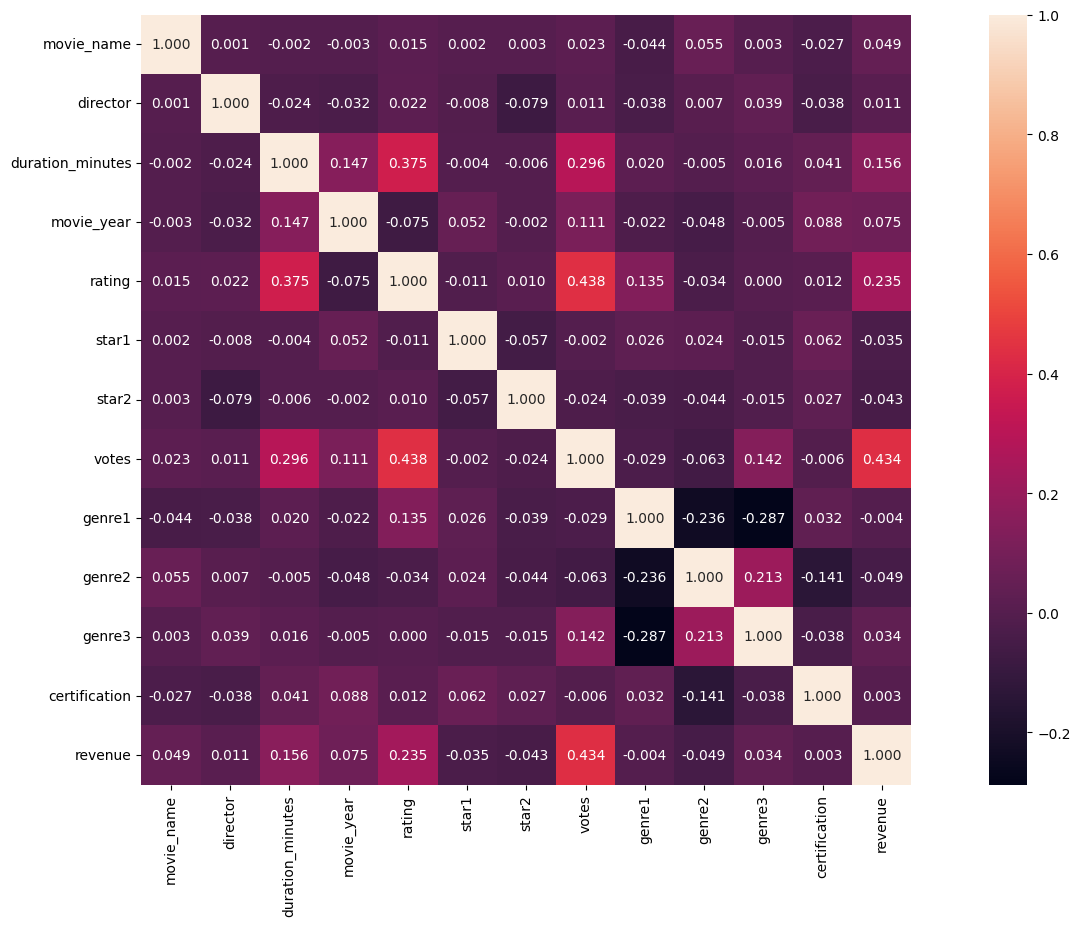

In [203]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(),annot=True,square=True, fmt='0.3f',annot_kws={'size':10})

In [95]:
we can also drop the geners beacuse it having multicolonierity

SyntaxError: invalid syntax (3128923756.py, line 1)

## all the columns having good coorealtion 

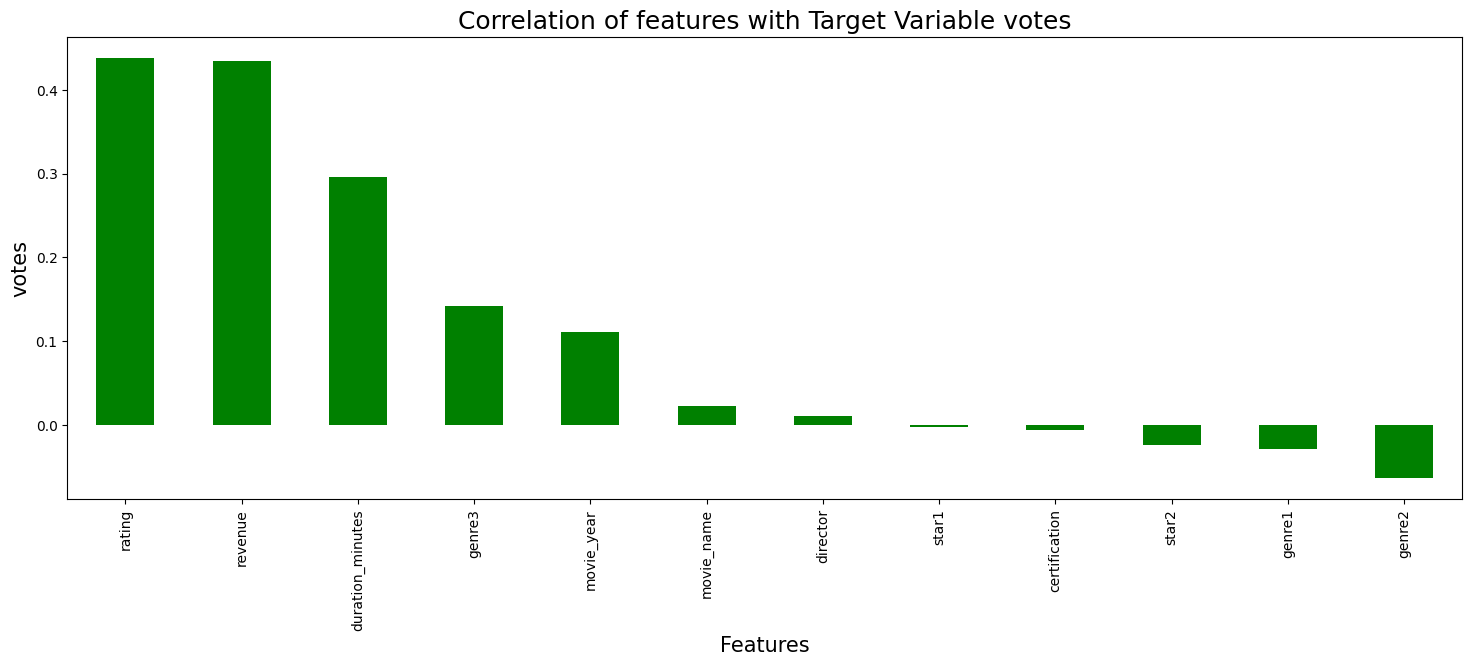

In [204]:
plt.figure(figsize = (18,6))
df2.corr()['votes'].drop(['votes']).sort_values(ascending=False).plot(kind='bar',color = 'green')
plt.xlabel('Features',fontsize=15)
plt.ylabel('votes',fontsize=15)
plt.title('Correlation of features with Target Variable votes',fontsize = 18)
plt.show()

### lets check for the multicolinearity with the use of VIF

In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [206]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df2.values,i) for i in range(df2.shape[1])]
vif['Features']= df2.columns
vif

,VIF,Features
0,3.672712,movie_name
1,3.784463,director
2,1.232428,duration_minutes
3,1.074122,movie_year
4,1.436764,rating
5,3.688385,star1
6,3.470894,star2
7,1.540518,votes
8,1.170741,genre1
9,2.521521,genre2


we can take threshold value 10 and all our variables are under this threshold value good to go on next step

# Now we have to split our dataset and scale our dataframe for model building

In [207]:
x=df2.drop(['revenue'],axis=1)
y=df2['revenue']

In [208]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [209]:
sc=StandardScaler()
mc=MinMaxScaler()

In [210]:
X_scale=pd.DataFrame(mc.fit_transform(x),columns=x.columns)

In [214]:
X_scale

,movie_name,director,duration_minutes,movie_year,rating,star1,star2,votes,genre1,genre2,genre3,certification
0,0.351351,0.158520,0.845763,0.640460,1.000000,0.461538,0.340909,1.000000,0.0,0.076923,0.750,0.85
1,0.833333,0.558785,0.763915,0.409307,0.979221,0.487179,0.409091,0.972421,0.0,0.769231,0.250,0.45
2,0.681682,0.373844,0.667217,0.124904,0.979221,0.538462,0.227273,0.917343,0.0,0.076923,0.375,0.85
3,0.716216,0.389696,0.771251,0.274267,0.958303,0.051282,0.500000,0.893299,0.0,0.769231,0.250,0.45
4,0.680931,0.330251,0.640227,0.090344,0.958303,0.538462,0.227273,0.925020,0.0,0.076923,0.375,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...
1328,0.220721,0.988111,0.368294,0.528162,0.000000,0.794872,0.045455,0.216791,0.0,0.076923,0.125,0.70
1329,0.406156,0.303831,0.826499,1.000000,0.000000,0.512821,0.659091,0.284151,0.0,0.307692,0.375,0.60
1330,0.884384,0.084544,0.447430,0.593996,0.000000,0.615385,0.704545,0.329938,0.0,0.076923,0.125,0.70
1331,0.998498,0.498018,0.422034,0.793266,0.000000,0.871795,0.136364,0.125862,0.0,0.076923,0.125,0.65


## this is for our first target variable which is Revenue

## importing ml libraries for Regression

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso

## Finding the best random state

In [216]:
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,y,test_size = 0.30, random_state=i)
    log_reg=LinearRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=r2_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.25017992955021406 on Random_state 412


In [217]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=48,test_size=0.30)

##### now we can make a list for all models and then use a for loop for all

In [218]:
model=[ LinearRegression(),
        #LogisticRegression(),
        GradientBoostingRegressor(),
        ExtraTreesRegressor(),
        AdaBoostRegressor(),
        DecisionTreeRegressor(),
        Lasso(),
        Ridge()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    pred_train=m.predict(X_train)
    print('\033[1m'+'Regression ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'r2_score :'+'\033[0m\n', r2_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'r2_score on training data :'+'\033[0m\n', r2_score(Y_train, pred_train)*100)
    print('\n')
    print('\033[1m'+'mean_absolute_error :'+'\033[0m \n',mean_absolute_error(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'mean_squared_error :'+'\033[0m \n',mean_squared_error(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'root mean squared error :'+'\033[0m\n', np.sqrt(mean_squared_error(Y_test, y_pred)))
    print('\n')
    print('============================================================================================================')

Regression ML Algorithm Evaluation Matrix LinearRegression() is


r2_score :
 0.18106549578881237


r2_score on training data :
 20.106358183184213


mean_absolute_error : 
 48.12161350977014


mean_squared_error : 
 4252.354738451493


root mean squared error :
 65.2100815706551


Regression ML Algorithm Evaluation Matrix GradientBoostingRegressor() is


r2_score :
 0.24542821442312968


r2_score on training data :
 59.12798799641521


mean_absolute_error : 
 45.88722473175362


mean_squared_error : 
 3918.1483884236777


root mean squared error :
 62.59511473289012


Regression ML Algorithm Evaluation Matrix ExtraTreesRegressor() is


r2_score :
 0.16807715508524046


r2_score on training data :
 100.0


mean_absolute_error : 
 48.783005


mean_squared_error : 
 4319.7972895364


root mean squared error :
 65.72516481178575


Regression ML Algorithm Evaluation Matrix AdaBoostRegressor() is


r2_score :
 0.13402803101750194


r2_score on training data :
 27.76282319007145


mean_absol

### cross_validation

In [219]:
from sklearn.model_selection import cross_val_score
model=[ LinearRegression(),
        GradientBoostingRegressor(),
        ExtraTreesRegressor(),
        AdaBoostRegressor(),
        DecisionTreeRegressor(),
        Lasso(),
        Ridge()]

for m in model:
    score = cross_val_score(m, X_scale, y, cv =5)
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("diffrence between r2_score and cross_val score is ",(r2_score(Y_test, y_pred)-score.mean())*100)
    print('\n')
    print('============================================================================================================')



Cross Validation Score LinearRegression() :

Score : [ 0.15604434  0.18855201  0.09092794  0.09470289 -0.09887994]
Mean Score : 0.08626944893876118
diffrence between r2_score and cross_val score is  9.47960468500512




Cross Validation Score GradientBoostingRegressor() :

Score : [ 0.13446903  0.12979758 -0.01976288 -0.0574696  -0.22791937]
Mean Score : -0.00817704525450529
diffrence between r2_score and cross_val score is  26.890749500947127




Cross Validation Score ExtraTreesRegressor() :

Score : [ 0.14178672  0.17354918  0.00617938 -0.01493971 -0.18183852]
Mean Score : 0.02494741171339192
diffrence between r2_score and cross_val score is  14.526910055015668




Cross Validation Score AdaBoostRegressor() :

Score : [ 0.08715342  0.08454336  0.06157635 -0.26634118 -1.4290089 ]
Mean Score : -0.2924153899490435
diffrence between r2_score and cross_val score is  34.32630618573319




Cross Validation Score DecisionTreeRegressor() :

Score : [-0.40040519 -0.74650378 -0.89492593 -1.3

In [220]:
from sklearn.model_selection import GridSearchCV

In [229]:
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]

# Create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=Lasso(), param_grid={'alpha': alpha_values}, cv=5)

# Perform the grid search on the training data
grid_search.fit(X_train, Y_train)



GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]})

In [236]:
grid_search.best_params_

{'alpha': 1.0}

In [238]:
model=Lasso(alpha=1,max_iter=100,tol=0.1)

In [240]:
model.fit(X_train,Y_train)
pred=model.predict(X_test)

print("R2_score",r2_score(Y_test,pred))
print("mean squared error",mean_squared_error(Y_test,pred))
print("mean absolute error",mean_absolute_error(Y_test,pred))
print("root mean squared error",np.sqrt(mean_squared_error(Y_test,pred)))

R2_score 0.18052323520073554
mean squared error 4255.1704512701945
mean absolute error 48.024751859721526
root mean squared error 65.23166754935976


## saving the model

In [291]:
import joblib
import pickle
filename="revenue.pkl"
pickle.dump(model,open(filename,"wb"))

# for revenue prediction

In [273]:
df3=df1.copy()

In [274]:
df3.drop(["S.no"],axis=1,inplace=True)
df3.reset_index(drop=True, inplace=True)

In [275]:
sk=['movie_year','rating','revenue','duration_minutes']

In [276]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')


In [278]:
df3[sk] = scaler.fit_transform(df3[sk].values)
df3[sk].skew()

movie_year         -0.369341
rating             -0.004752
revenue            -0.066515
duration_minutes    0.019049
dtype: float64

In [279]:
from sklearn.preprocessing import LabelEncoder
category=['director','movie_name','star1','star2','genre1','genre2','genre3','certification']
le=LabelEncoder()
for i in category:
    df3[i]=le.fit_transform(df3[i])

In [280]:
df3

,movie_name,director,duration_minutes,movie_year,rating,star1,star2,votes,genre1,genre2,genre3,certification,revenue
0,468,120,1.643013,0.203948,2.707936,18,15,2432910,0,1,12,17,1.998337
1,1110,423,1.199134,-0.767041,2.598212,19,18,1971356,0,10,4,9,1.344473
2,908,283,0.674714,-1.961716,2.598212,21,10,1329966,0,1,6,17,1.988916
3,954,295,1.238920,-1.334295,2.487758,2,22,1131201,0,10,4,9,1.552210
4,907,250,0.528342,-2.106891,2.487758,21,10,1402212,0,1,6,14,2.128378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,294,748,-0.946421,-0.267775,-2.572502,31,2,49283,0,1,2,14,-0.736001
1329,541,230,1.538543,1.714247,-2.572502,20,29,62188,0,4,6,12,-0.661348
1330,1178,64,-0.517244,0.008771,-2.572502,24,31,73346,0,1,2,14,-0.284781
1331,1330,377,-0.654975,0.845834,-2.572502,34,6,36636,0,1,2,13,-0.401382


In [284]:
x=df3.drop(['votes'],axis=1)
y=df3['votes']


In [285]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc=StandardScaler()
mc=MinMaxScaler()

X_scale=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
X_scale

,movie_name,director,duration_minutes,movie_year,rating,star1,star2,genre1,genre2,genre3,certification,revenue
0,-0.514548,-1.259271,1.643013,0.203948,2.707936,-0.109341,-0.512802,-0.199453,-0.836996,0.993740,1.059007,1.998337
1,1.153835,0.130917,1.199134,-0.767041,2.598212,-0.020196,-0.276628,-0.199453,2.260301,-0.712466,-1.141977,1.344473
2,0.628892,-0.511414,0.674714,-1.961716,2.598212,0.158094,-0.906425,-0.199453,-0.836996,-0.285914,1.059007,1.988916
3,0.748433,-0.456357,1.238920,-1.334295,2.487758,-1.535662,0.038270,-0.199453,2.260301,-0.712466,-1.141977,1.552210
4,0.626293,-0.662821,0.528342,-2.106891,2.487758,0.158094,-0.906425,-0.199453,-0.836996,-0.285914,0.233638,2.128378
...,...,...,...,...,...,...,...,...,...,...,...,...
1328,-0.966726,1.622042,-0.946421,-0.267775,-2.572502,1.049544,-1.536221,-0.199453,-0.836996,-1.139017,0.233638,-0.736001
1329,-0.324841,-0.754582,1.538543,1.714247,-2.572502,0.068949,0.589341,-0.199453,0.195437,-0.285914,-0.316608,-0.661348
1330,1.330548,-1.516203,-0.517244,0.008771,-2.572502,0.425529,0.746790,-0.199453,-0.836996,-1.139017,0.233638,-0.284781
1331,1.725554,-0.080135,-0.654975,0.845834,-2.572502,1.316980,-1.221323,-0.199453,-0.836996,-1.139017,-0.041485,-0.401382


In [287]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso

In [288]:
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,y,test_size = 0.30, random_state=i)
    log_reg=LinearRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=r2_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=maxRS,test_size=0.30)



Best accuracy is 0.4323785011315594 on Random_state 364


In [290]:
model=[ LinearRegression(),
        #LogisticRegression(),
        GradientBoostingRegressor(),
        ExtraTreesRegressor(),
        AdaBoostRegressor(),
        DecisionTreeRegressor(),
        Lasso(),
        Ridge()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    pred_train=m.predict(X_train)
    print('\033[1m'+'Regression ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'r2_score :'+'\033[0m\n', r2_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'r2_score on training data :'+'\033[0m\n', r2_score(Y_train, pred_train)*100)
    print('\n')
    print('\033[1m'+'mean_absolute_error :'+'\033[0m \n',mean_absolute_error(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'mean_squared_error :'+'\033[0m \n',mean_squared_error(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'root mean squared error :'+'\033[0m\n', np.sqrt(mean_squared_error(Y_test, y_pred)))
    print('\n')
    print('============================================================================================================')

Regression ML Algorithm Evaluation Matrix LinearRegression() is


r2_score :
 0.4323785011315595


r2_score on training data :
 32.75879788532081


mean_absolute_error : 
 111357.93601988176


mean_squared_error : 
 25108540477.252647


root mean squared error :
 158456.74639235984


Regression ML Algorithm Evaluation Matrix GradientBoostingRegressor() is


r2_score :
 0.5528514465164118


r2_score on training data :
 84.2199982344223


mean_absolute_error : 
 91655.20445578643


mean_squared_error : 
 19779461448.992477


root mean squared error :
 140639.47329605752


Regression ML Algorithm Evaluation Matrix ExtraTreesRegressor() is


r2_score :
 0.5294437556913091


r2_score on training data :
 100.0


mean_absolute_error : 
 96772.066375


mean_squared_error : 
 20814892548.295017


root mean squared error :
 144273.67240177613


Regression ML Algorithm Evaluation Matrix AdaBoostRegressor() is


r2_score :
 0.27845395738667056


r2_score on training data :
 53.35615364443167


mea

## cross_validation

In [292]:

from sklearn.model_selection import cross_val_score
model=[ LinearRegression(),
        GradientBoostingRegressor(),
        ExtraTreesRegressor(),
        AdaBoostRegressor(),
        DecisionTreeRegressor(),
        Lasso(),
        Ridge()]

for m in model:
    score = cross_val_score(m, X_scale, y, cv =5)
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("diffrence between r2_score and cross_val score is ",(r2_score(Y_test, y_pred)-score.mean())*100)
    print('\n')
    print('============================================================================================================')



Cross Validation Score LinearRegression() :

Score : [-0.04401603  0.06092927 -0.12607428 -0.07809867 -6.57340569]
Mean Score : -1.3521330810674717
diffrence between r2_score and cross_val score is  178.4511582199031




Cross Validation Score GradientBoostingRegressor() :

Score : [-0.04448232  0.28892314  0.23820284  0.18323938 -0.23161429]
Mean Score : 0.086853748316768
diffrence between r2_score and cross_val score is  46.82433212600398




Cross Validation Score ExtraTreesRegressor() :

Score : [-0.04519389  0.26830898  0.20635976  0.0691523  -0.29959932]
Mean Score : 0.03980556581325536
diffrence between r2_score and cross_val score is  47.19234499619682




Cross Validation Score AdaBoostRegressor() :

Score : [-0.01705991 -0.2614625  -0.55237775 -3.17097405 -7.45626449]
Mean Score : -2.2916277382549164
diffrence between r2_score and cross_val score is  243.61780208094706




Cross Validation Score DecisionTreeRegressor() :

Score : [-0.04162431 -0.85807275 -0.53116554 -1.3926

In [308]:
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[500],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)

In [309]:
search.fit(X_train,Y_train)
search.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 500,
 'random_state': 1,
 'subsample': 0.75}

In [ ]:
GBR2=GradientBoostingRegressor(n_estimators=500,learning_rate=0.01,subsample=.75,max_depth=4,random_state=1)
score=np.mean(cross_val_score(GBR2,X_train,Y_train,scoring='neg_mean_squared_error',cv=5,n_jobs=1))
score

In [315]:
GBR2.fit(X_train,Y_train)
pred=GBR2.predict(X_test)

In [317]:
print("R2_score",r2_score(Y_test,pred))
print("mean squared error",mean_squared_error(Y_test,pred))
print("mean absolute error",mean_absolute_error(Y_test,pred))
print("root mean squared error",np.sqrt(mean_squared_error(Y_test,pred)))

R2_score 0.5613027369466392
mean squared error 19405621542.865932
mean absolute error 90283.23147706002
root mean squared error 139304.06147297332


In [318]:
import joblib
import pickle
filename="votes.pkl"